# Problem Statement:

-Create a predictive model  to  identify the factors / customer segments that are eligible for taking loan.

-Machine learning can help to identify driving factors behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this method for its portfolio and risk assessment.

In [1]:
#Importing all basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Removing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# There are 7 CSV files 

In [3]:
#Loading the data (Main CSV file which includes target column)
d1=pd.read_csv('application_train.csv')


In [4]:
#Loading the data
d2=pd.read_csv('bureau.csv')

In [5]:
#Loading the data
d3=pd.read_csv('bureau_balance.csv')


In [6]:
#Loading the data
d4=pd.read_csv('credit_card_balance.csv')


In [7]:
#Loading the data
d5=pd.read_csv('installments_payments.csv')


In [8]:
#Loading the data
d6=pd.read_csv('POS_CASH_balance.csv')


In [9]:
#Loading the data
d7=pd.read_csv('previous_application.csv')


In [ ]:
# Trying to concat all CSV files

In [ ]:
data=pd.concat([d1,d2,d3,d4,d5,d6,d7],axis=1)

#MemoryError: Unable to allocate 8.34 GiB for an array with shape (41, 27299925) and data type float64


In [ ]:
# Due to Memory Error we are unable to merge all CSV file, so we are going to work on only 1 CSV file which is main CSV file (application_train.csv) includes target column i.e....>  Target(1:Defaulter ; 0: Not Defaulter)
# Also we are going to do only some basic analysis on other CSV files

In [10]:
#To diplay all columns from dataset
d1.head(pd.set_option('display.max_columns',None))


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [11]:
# drop the irrelevant column
# SK_ID_CURR is just the loan ID which is unique for every individual which does not have any significance in model learning
#so drop the column of SK_ID_CURR

d1.drop('SK_ID_CURR',axis=1,inplace=True)

In [12]:
#Display all column names from main dataset
d1.columns.values.tolist()

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BU

# Domain Analysis:

## Home Loan default risk management:

-In finance, default is failure to meet the legal obligations (or conditions) of a loan. 

-Credit risk is the possibility of losing a lender holds due to a risk of default on a debt that may arise from a borrower failing to make required payments.

-Risk management is the identification, evaluation, and prioritization of risks followed by coordinated and economical application of resources to minimize, monitor, and control the probability or impact of unfortunate events or to maximize the realization of opportunities.


#### TARGET:
-Is our target (output) column that we are trying to predict
-Where 1 & 0 represents;- 1:Defaulter & 0: Not Defaulter

#### NAME_CONTRACT_TYPE:
-Identification if loan is cash or revolving

#### CODE_GENDER:
-Represents the gender as male(M) or female(F)

#### FLAG_OWN_CAR:
-Flag if the client owns a car

#### FLAG_OWN_REALTY:
-Flag if the client owns a house or flat

#### CNT_CHILDREN:
-Number of children the client has

#### AMT_INCOME_TOTAL:
-Total amount of income of the client

#### AMT_CREDIT:
-Credit amount of the loan

#### AMT_ANNUITY:
-Mount of loan annuity

#### AMT_GOODS_PRICE: 
-Amount of Price of the goods for which the loan is given

#### NAME_TYPE_SUITE: 
-Represents, who was accompanying client when he was applying for the loan

#### NAME_INCOME_TYPE: 
-Clients type of income

#### NAME_EDUCATION_TYPE:
-It represents highest level of education of the client

#### NAME_FAMILY_STATUS:
-Family status of the client

#### NAME_HOUSING_TYPE: 
-Housing situation of the client, renting or living with parents etc

#### REGION_POPULATION_RELATIVE:
-Population ogf region where client lives

#### DAYS_EMPLOYED:
-Represents how many days before the application the person started current employment

#### DAYS_REGISTRATION:
-How many days before the application did client change his registration

#### DAYS_ID_PUBLISH:
-How many days before the application did client change the identity document with which he applied for the loan

#### OWN_CAR_AGE:
-Repesents age of clients car

#### FLAG_MOBIL:
-Client having mobile or not

#### FLAG_EMP_PHONE:
-Client having phone or not

#### FLAG_WORK_PHONE:
-Client having work or not

#### FLAG_CONT_MOBILE:
-Mobile phone reachable or not

#### FLAG_PHONE:
-Client having home phone or not

#### FLAG_EMAIL:
-Client having email or not

#### OCCUPATION_TYPE: 
-What kind of occupation does the client have

#### CNT_FAM_MEMBERS: 
-Number of family members does client have

#### REGION_RATING_CLIENT:
-Rating of the region where client lives

#### REGION_RATING_CLIENT_W_CITY:
-Rating of the region where client lives wrt city

#### WEEKDAY_APPR_PROCESS_START:
-Represents on which day of the week did the client apply for the loan

#### HOUR_APPR_PROCESS_START:
-Represents, approximately at what hour did the client apply for the loan

#### REG_REGION_NOT_LIVE_REGION:
-Represents,if clients permanent address does not match contact address

#### REG_REGION_NOT_WORK_REGION:
-Flag if clietns permanent address does not match with work address

#### LIVE_REGION_NOT_WORK_REGION:
-Flag if clietns contact address does not match with work address

#### REG_CITY_NOT_LIVE_CITY:
-Flag if clietns permanent address does not match with contact address

#### REG_CITY_NOT_WORK_CITY:
-Flag if clietns permanent address does not match with work address

#### LIVE_CITY_NOT_WORK_CITY:
-Flag if clietns contact address does not match with work address

#### ORGANIZATION_TYPE:
-Type of organization where client works

#### EXT_SOURCE_1,  EXT_SOURCE_2, EXT_SOURCE_3:
-All these columns represents score from external data source

#### APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG,COMMONAREA_AVG, ELEVATORS_AVG,  ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG,  LANDAREA_AVG,  LIVINGAPARTMENTS_AVG,  LIVINGAREA_AVG,  NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG,  APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE,  FLOORSMIN_MODE,  LANDAREA_MODE, LIVINGAPARTMENTS_MODE,  LIVINGAREA_MODE,  NONLIVINGAPARTMENTS_MODE,  NONLIVINGAREA_MODE, APARTMENTS_MEDI,  BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI,  ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI,  LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE,  EMERGENCYSTATE_MODE' :


-All these columns gives Information about building where client lives
-What is the average,modus,median,apartment size,common area,living area,age of building,number of elevators, number of entrances, state of the building,number of floor,etc.


# Basic Checks

In [13]:
#checking number of rows & columns for main csv file
d1.shape

(307511, 121)

In [14]:
#checking number of rows & columns for other csv files

print(d2.shape)
print(d3.shape)
print(d4.shape)
print(d5.shape)
print(d6.shape)
print(d7.shape)

(1716428, 17)
(27299925, 3)
(3840312, 23)
(13605401, 8)
(10001358, 8)
(1670214, 37)


In [15]:
#column names of main csv file
d1.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [17]:
#column names of other csv files

print(d2.columns)
print(d3.columns)
print(d4.columns)
print(d5.columns)
print(d6.columns)
print(d7.columns)

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')
Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')
Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTA

In [19]:
#data type of columns of main csv file
d1.dtypes

TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [20]:
#data type of columns of other csv files

print(d2.dtypes)
print(d3.dtypes)
print(d4.dtypes)
print(d5.dtypes)
print(d6.dtypes)
print(d7.dtypes)

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object
SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object
SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_PO

In [21]:
#1st 5 rows of main csv file
d1.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          NaN   
1      -16765          -1188            -1186.0             -291          NaN   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          NaN   
4      -19932          -3038            -4311.0            -3458          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                     

In [22]:
#last 5 rows of main csv file
d1.tail()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
307506       0         Cash loans           M            N               N   
307507       0         Cash loans           F            N               Y   
307508       0         Cash loans           F            N               Y   
307509       1         Cash loans           F            N               Y   
307510       0         Cash loans           F            N               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506         225000.0   Unaccompanied               Working   
307507         225000.0   Unaccompanied             Pensioner   
307508         585000.0   Unaccompanied               Working   
307509         319500.0   Unaccompanied  Commercial associate   
307510         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506                       15                           0   
307507                     

In [23]:
#Entire information of main csv file
d1.info(verbose=True)    #verbose is used to get all info about all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DA

In [24]:
#Entire info of other csv files

print(d2.info())
print(d3.info())
print(d4.info())
print(d5.info())
print(d6.info())
print(d7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 

In [25]:
#statistical analysis of main csv file
d1.describe()

TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean        0.080729       0.417052      1.687979e+05  5.990260e+05   
std         0.272419       0.722121      2.371231e+05  4.024908e+05   
min         0.000000       0.000000      2.565000e+04  4.500000e+04   
25%         0.000000       0.000000      1.125000e+05  2.700000e+05   
50%         0.000000       0.000000      1.471500e+05  5.135310e+05   
75%         0.000000       1.000000      2.025000e+05  8.086500e+05   
max         1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307499.000000     3.072330e+05               307511.000000   
mean    27108.573909     5.383962e+05                    0.020868   
std     14493.737315     3.694465e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

         OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count  104582.000000  307511.000000   307511.000000    307511.000000   
mean       12.061091       0.999997        0.819889         0.199368   
std        11.944812       0.001803        0.384280         0.399526   
min         0.000000       0.000000        0.000000         0.000000   
25%         5.000000       1.000000        1.000000         0.000000   
50%         9.000000       1.000000        1.000000         0.000000   
75%        15.000000       1.000000        1.000000         0.000000   
max        91.000000       1.000000        1.000000         1.000000   

       FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  \
count     307511.000000  307511.000000  307511.000000    307509.000000   
mean           0.998133       0.281066       0.056720         2.152665   
std            0.043164       0.449521       0.231307         0.910682   
min            0.000000       0.000000       0.000000         1.000000   
25%            1.000000       0.000000       0.000000         2.000000   
50%            1.000000       0.000000       0.000000         2.000000   
75%            1.000000       1.000000       0.000000         3.000000   
max            1.000000       1.000000       1.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         307511.000000                307511.000000   
mean               2.052463                     2.031521   
std                0.509034                     0.502737   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.265832   

In [26]:
#statistical analysis of other csv files

print(d2.describe())
print(d3.describe())
print(d4.describe())
print(d5.describe())
print(d6.describe())
print(d7.describe())


         SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+0

         SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000

In [27]:
#check null values for main csv file
d1.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 121, dtype: int64

In [28]:
#check null values for other csv files

print(d2.isnull().sum())
print(d3.isnull().sum())
print(d4.isnull().sum())
print(d5.isnull().sum())
print(d6.isnull().sum())
print(d7.isnull().sum())

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64
SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64
SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT

In [29]:
#Unique value of output (target) in main csv file
d1.TARGET.unique()

array([1, 0], dtype=int64)

In [30]:
#Records related to 0 & 1
d1.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [31]:
#Check column names containing numerical data
numerical_data=d1.select_dtypes(include='number')
numerical_data

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0            1             0          202500.0    406597.5      24700.5   
1            0             0          270000.0   1293502.5      35698.5   
2            0             0           67500.0    135000.0       6750.0   
3            0             0          135000.0    312682.5      29686.5   
4            0             0          121500.0    513000.0      21865.5   
...        ...           ...               ...         ...          ...   
307506       0             0          157500.0    254700.0      27558.0   
307507       0             0           72000.0    269550.0      12001.5   
307508       0             0          153000.0    677664.0      29979.0   
307509       1             0          171000.0    370107.0      20205.0   
307510       0             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0              351000.0                    0.018801       -9461   
1             1129500.0                    0.003541      -16765   
2              135000.0                    0.010032      -19046   
3              297000.0                    0.008019      -19005   
4              513000.0                    0.028663      -19932   
...                 ...                         ...         ...   
307506         225000.0                    0.032561       -9327   
307507         225000.0                    0.025164      -20775   
307508         585000.0                    0.005002      -14966   
307509         319500.0                    0.005313      -11961   
307510         675000.0                    0.046220      -16856   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0                -637            -3648.0            -2120          NaN   
1               -1188            -1186.0             -291          NaN   
2                -225            -4260.0            -2531         26.0   
3               -3039            -9833.0            -2437          NaN   
4               -3038            -4311.0            -3458          NaN   
...               ...                ...              ...          ...   
307506           -236            -8456.0            -1982          NaN   
307507         365243            -4388.0            -4090          NaN   
307508          -7921            -6737.0            -5150          NaN   
307509          -4786            -2562.0             -931          NaN   
307510          -1262            -5128.0             -410          NaN   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0                1               1                0                 1   
1                1               1                0                 1   
2                1               1                1                 1   
3                1               1                0                 1   
4                1               1                0                 1   
...            ...             ...              ...               ...   
307506           1               1                0                 1   
307507           1               0                0                 1   
307508           1               1                0                 1   
307509           1               1                0                 1   
307510           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                1           0              1.0                     2   
1                1           0              2.0                     1   
2                1           0              1.0                     2   
3                0           0              2.0                     2   
4                0           0              1.0                     2   
...            ...         ...              ...                   ...   
307506           0       

In [32]:
#Check column names containing categorical data
categorical_data=d1.select_dtypes(include='object')
categorical_data

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment             NaN   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
0                       WEDNESDAY  Business Entity Type 3   reg oper account   
1                          MONDAY                  School   reg oper account   
2                          MONDAY              Government                NaN   
3                       WEDNESDAY  Business Entity Type 3                NaN   
4                        THURSDAY                Religion                NaN   
...                           ...                     ...                ...   
307506                   THURSDAY                Services   reg oper account   
307507                     MONDAY                     XNA   reg oper account   
307508                   THURSDAY                  School   reg oper account   
307509                  WEDNESDAY  Business Entity Type 1                NaN   
307510                   THURSDAY  Business Entity Type 3                NaN   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       block of flats       Stone, brick                  No  
1       block of flats              Block                  No  
2                  NaN                NaN                 NaN  
3                  NaN                NaN                 NaN  
4                  NaN                NaN                 NaN  
...                ...                ...                 ...  
307

In [33]:
#In categorical data: if unique is giving the value 1 then that categorical column is a constant column, simply drop them
d1.describe(include='O')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

In [ ]:
#There is no unique value which giving value 1, so we are not dropping any one of them

In [34]:
#Analyse the categorical columns=> Unique value & Value counts
for i in categorical_data:
    print(i,d1[i].unique())
    print(d1[i].value_counts())
    print('....................')

NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans']
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
....................
CODE_GENDER ['M' 'F' 'XNA']
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
....................
FLAG_OWN_CAR ['N' 'Y']
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
....................
FLAG_OWN_REALTY ['Y' 'N']
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
....................
NAME_TYPE_SUITE ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
....................
NAME_INCOME_TYPE ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Working        

# EDA

In [24]:
#All analysis for main csv file
#Univariate Analysis

#installing sweetviz library
!pip install sweetviz

In [35]:
#due to more columns in numerical data, bifurcating it to plot graphs
n1=numerical_data.iloc[:, 0:55]

In [36]:
n2=numerical_data.iloc[:, 55:]

In [13]:
#importing sweetviz library
import sweetviz as sv
#syntax to use sweetviz
report1 = sv.analyze(categorical_data)
#Default arguments will generate to "SWEETVIZ_REPORT.html"
report1.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
#importing sweetviz library
import sweetviz as sv
#syntax to use sweetviz
report2 = sv.analyze(n1)
#Default arguments will generate to "SWEETVIZ_REPORT.html"
report2.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
#importing sweetviz library
import sweetviz as sv
#syntax to use sweetviz
report3 = sv.analyze(n2)
#Default arguments will generate to "SWEETVIZ_REPORT.html"
report3.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


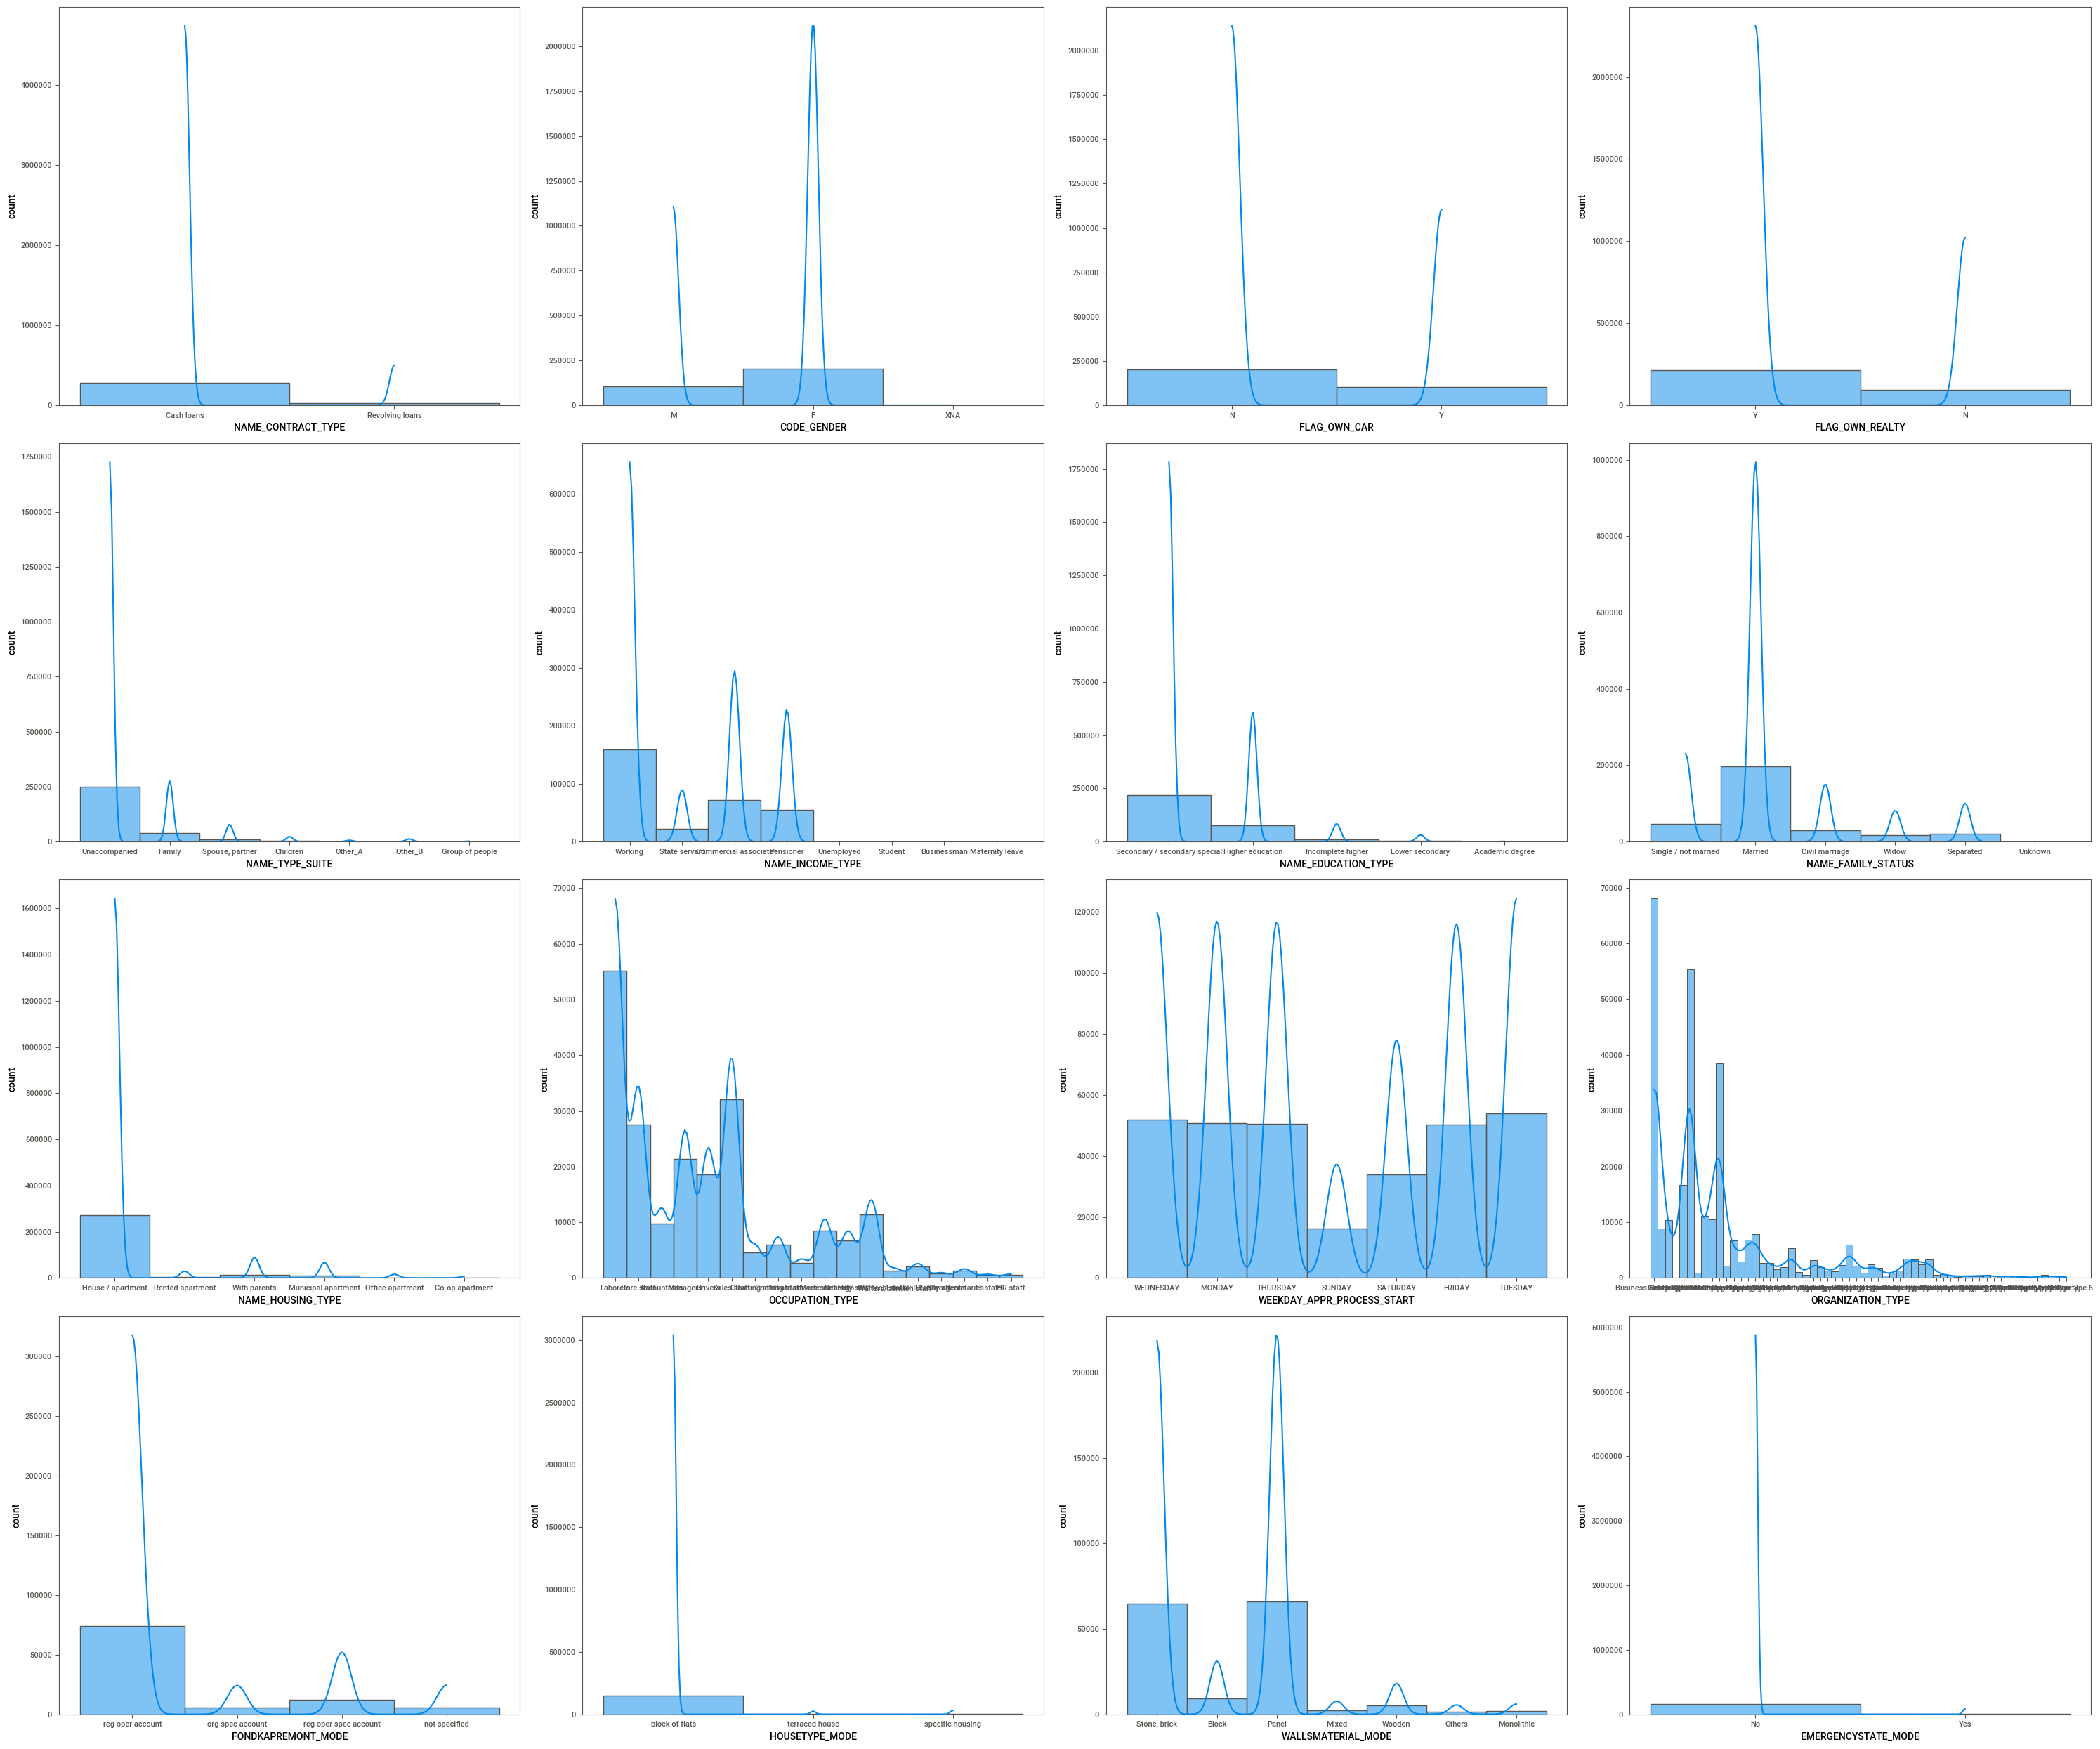

In [27]:
# set canvas size (Categorical Data)
plt.figure(figsize=(30,25))
plotnum=1
for column in categorical_data:
    if plotnum<=16:
        ax=plt.subplot(4,4,plotnum)
        sns.histplot(x=categorical_data[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count',fontsize=10)
        plotnum+=1
    plt.tight_layout()

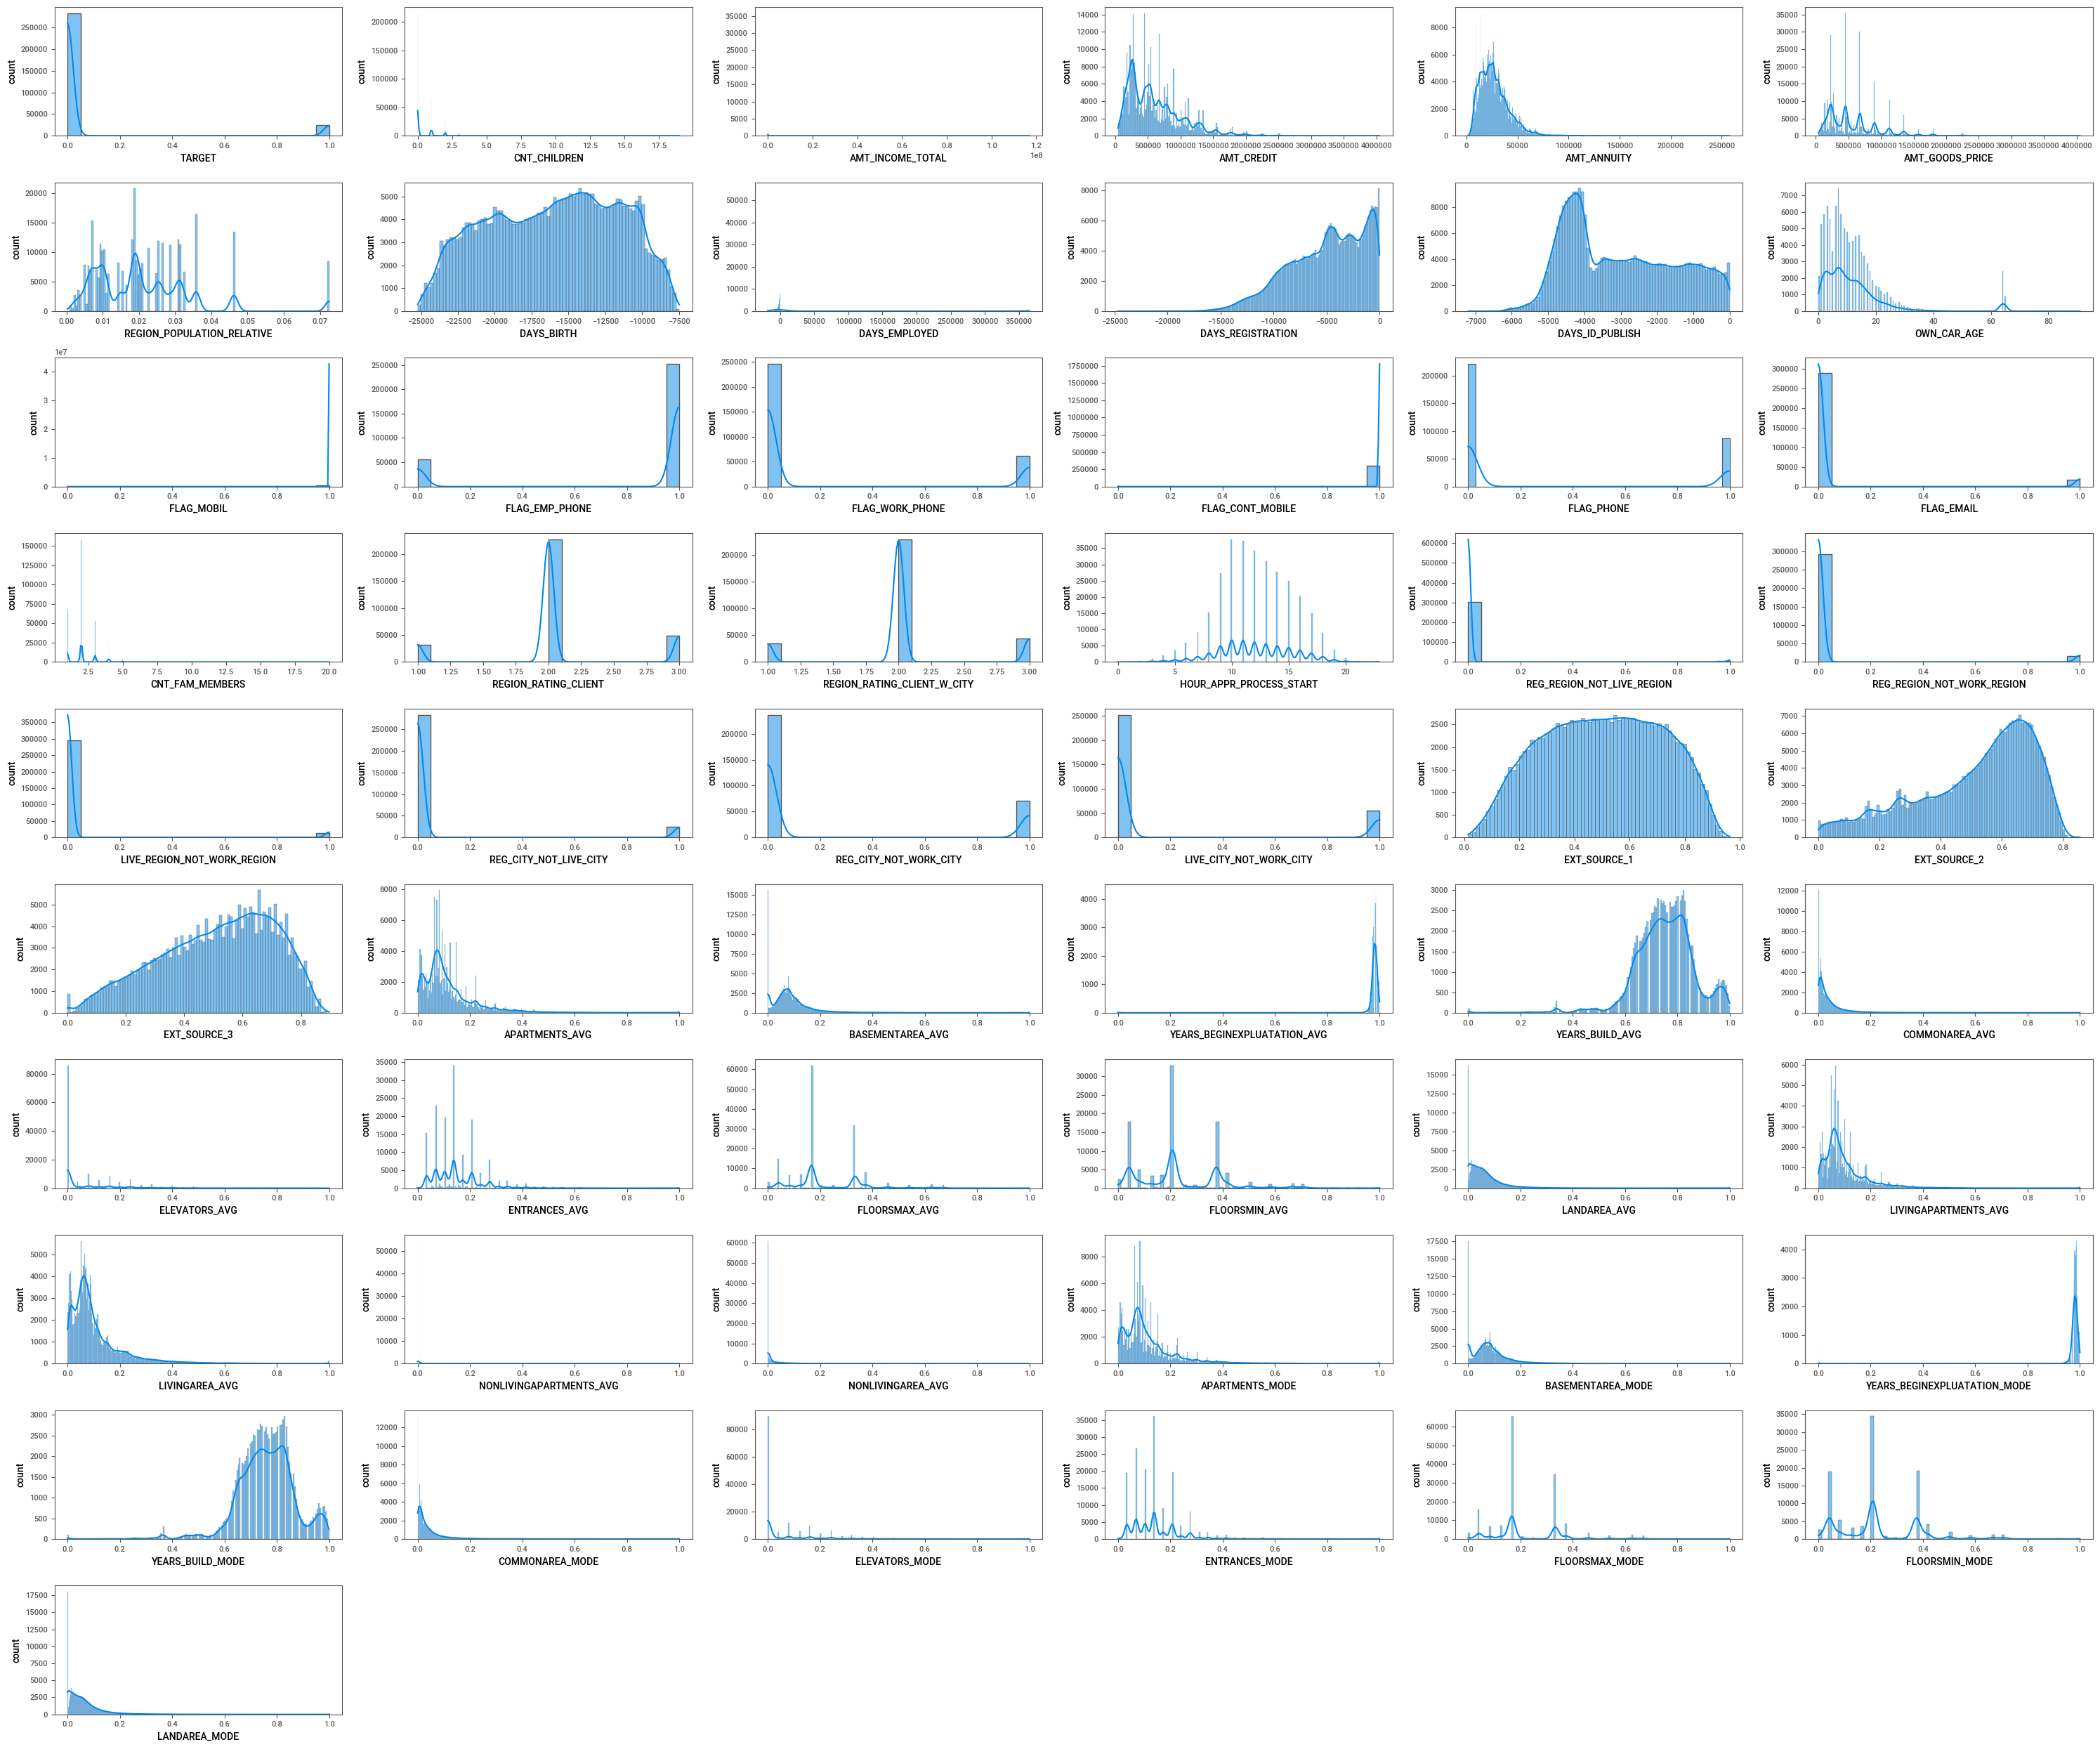

In [24]:
# set canvas size (Numerical Data) n1
plt.figure(figsize=(30,25))
plotnum=1
for column in n1:
    if plotnum<=55:
        ax=plt.subplot(10,6,plotnum)
        sns.histplot(x=n1[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count',fontsize=10)
        plotnum+=1
    plt.tight_layout()

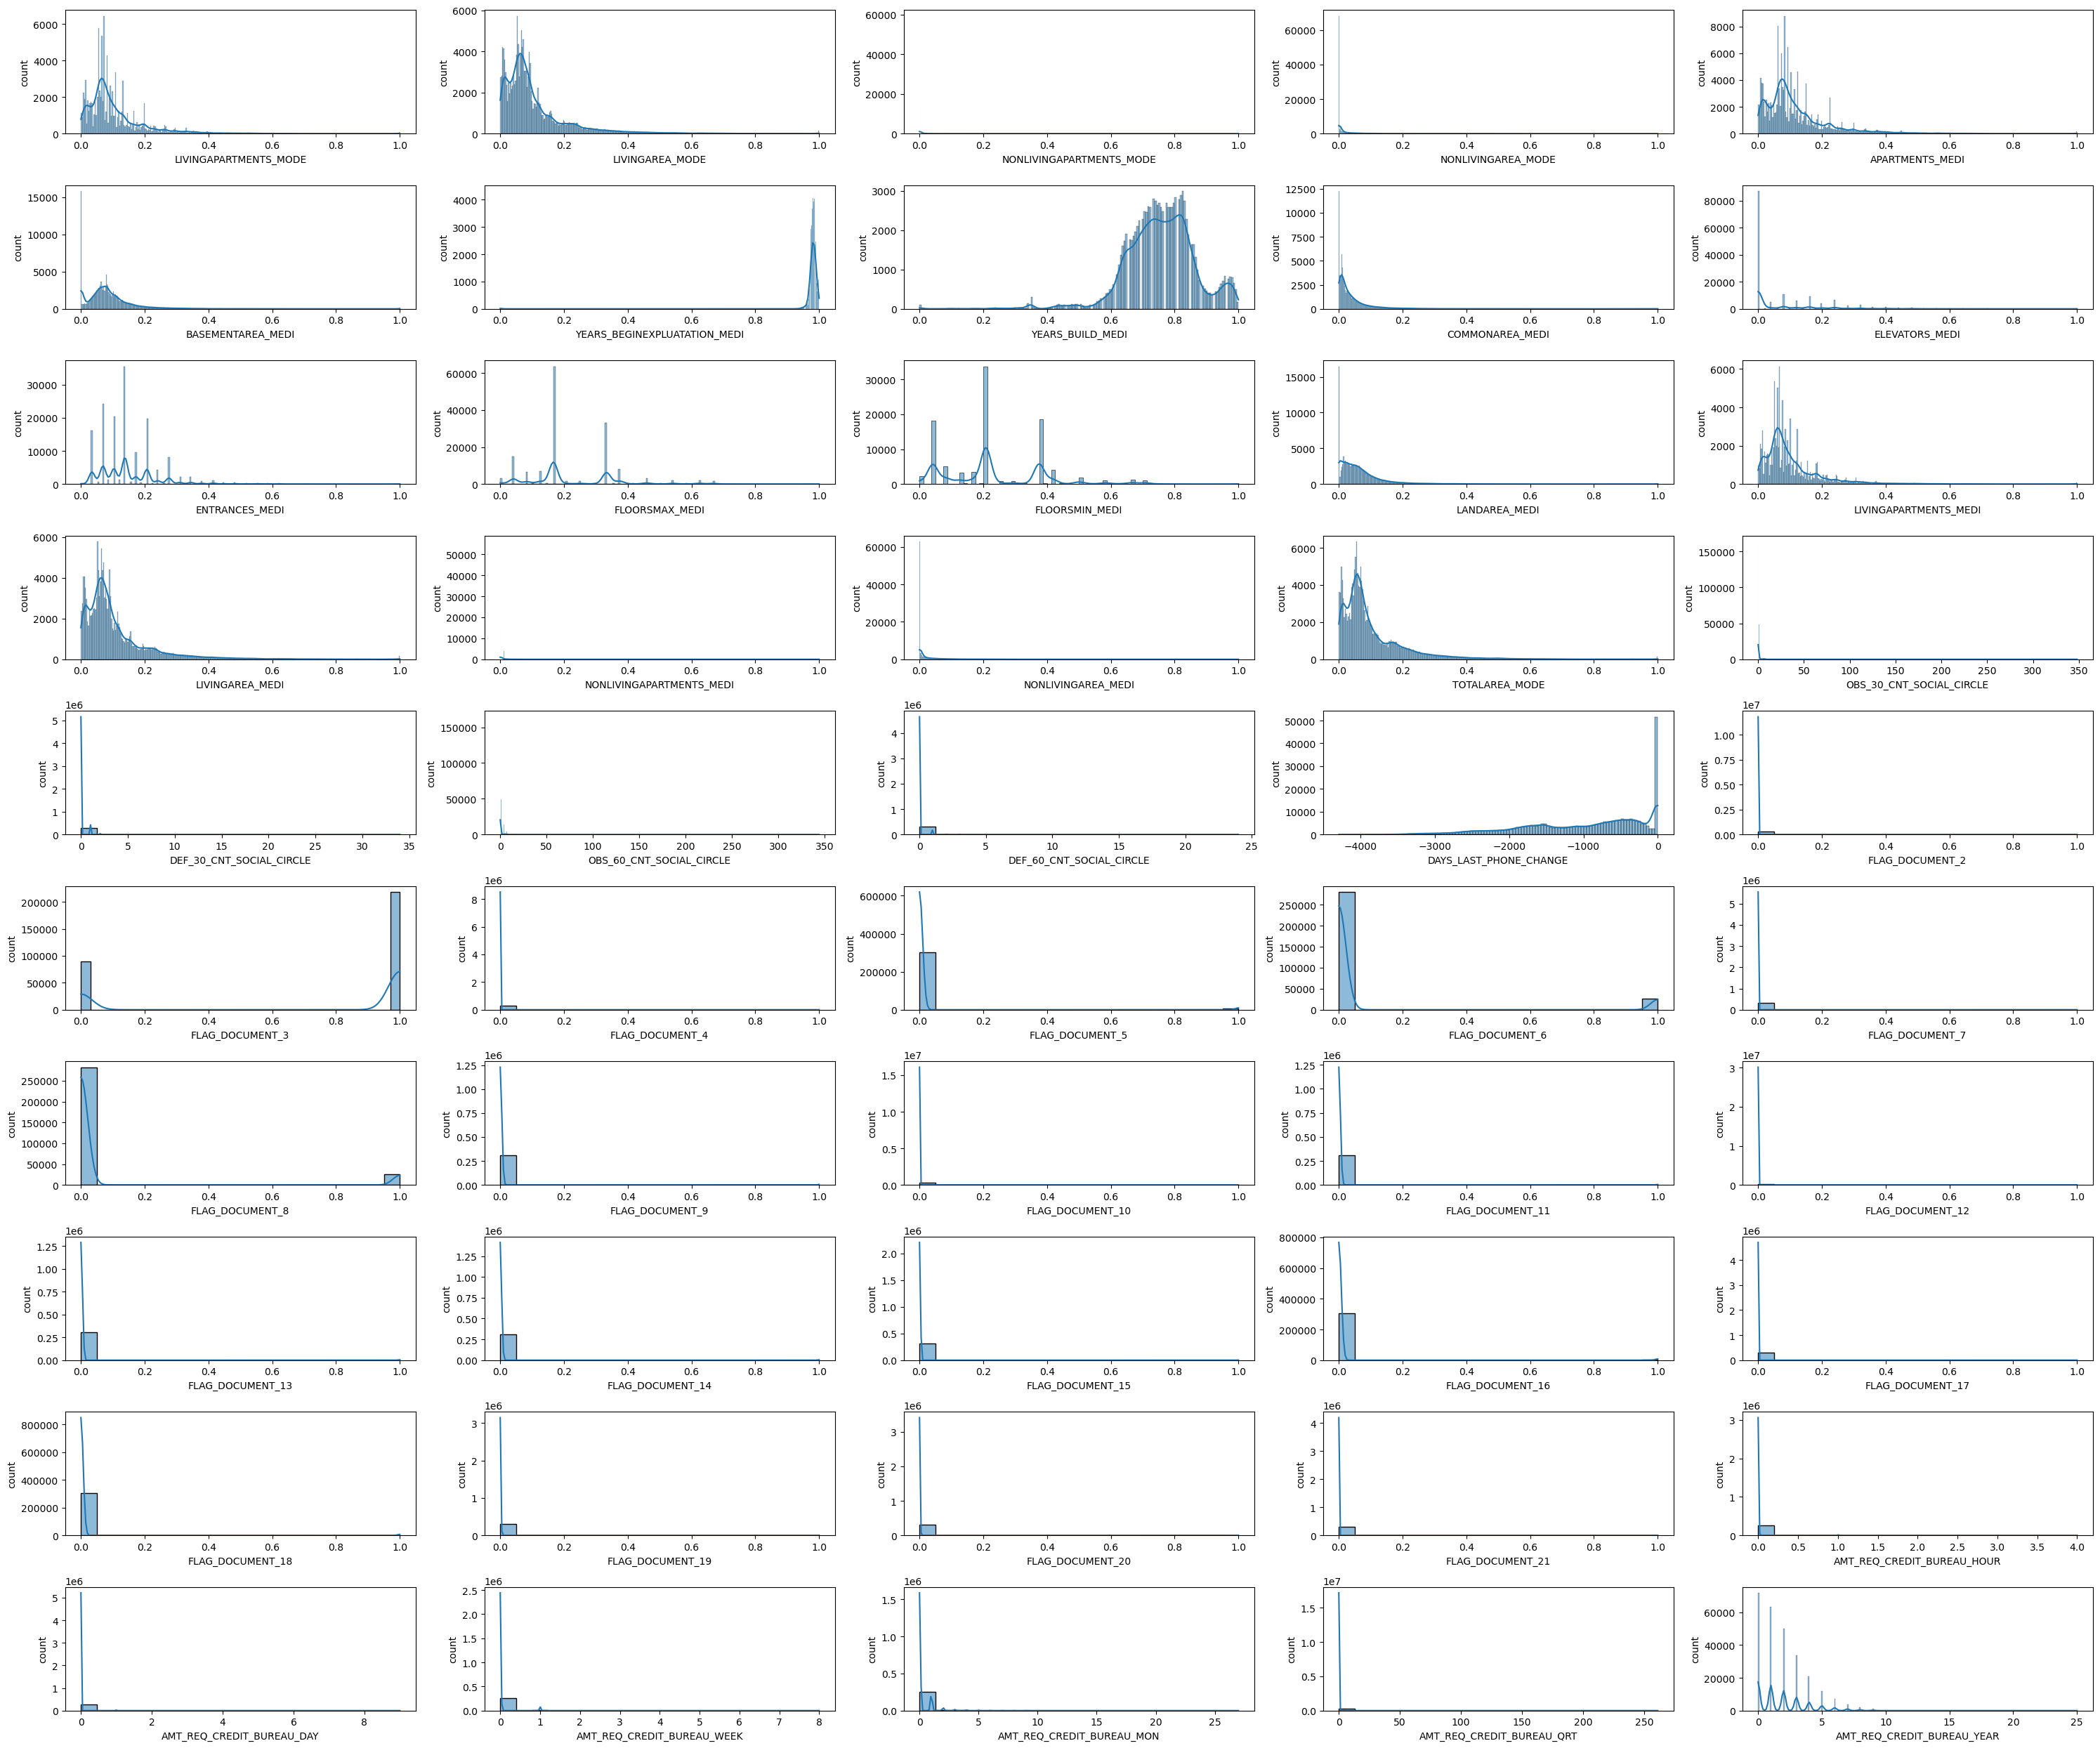

In [13]:
# set canvas size (Numerical Data) n2
plt.figure(figsize=(30,25))
plotnum=1
for column in n2:
    if plotnum<=50:
        ax=plt.subplot(10,5,plotnum)
        sns.histplot(x=n2[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count',fontsize=10)
        plotnum+=1
    plt.tight_layout()

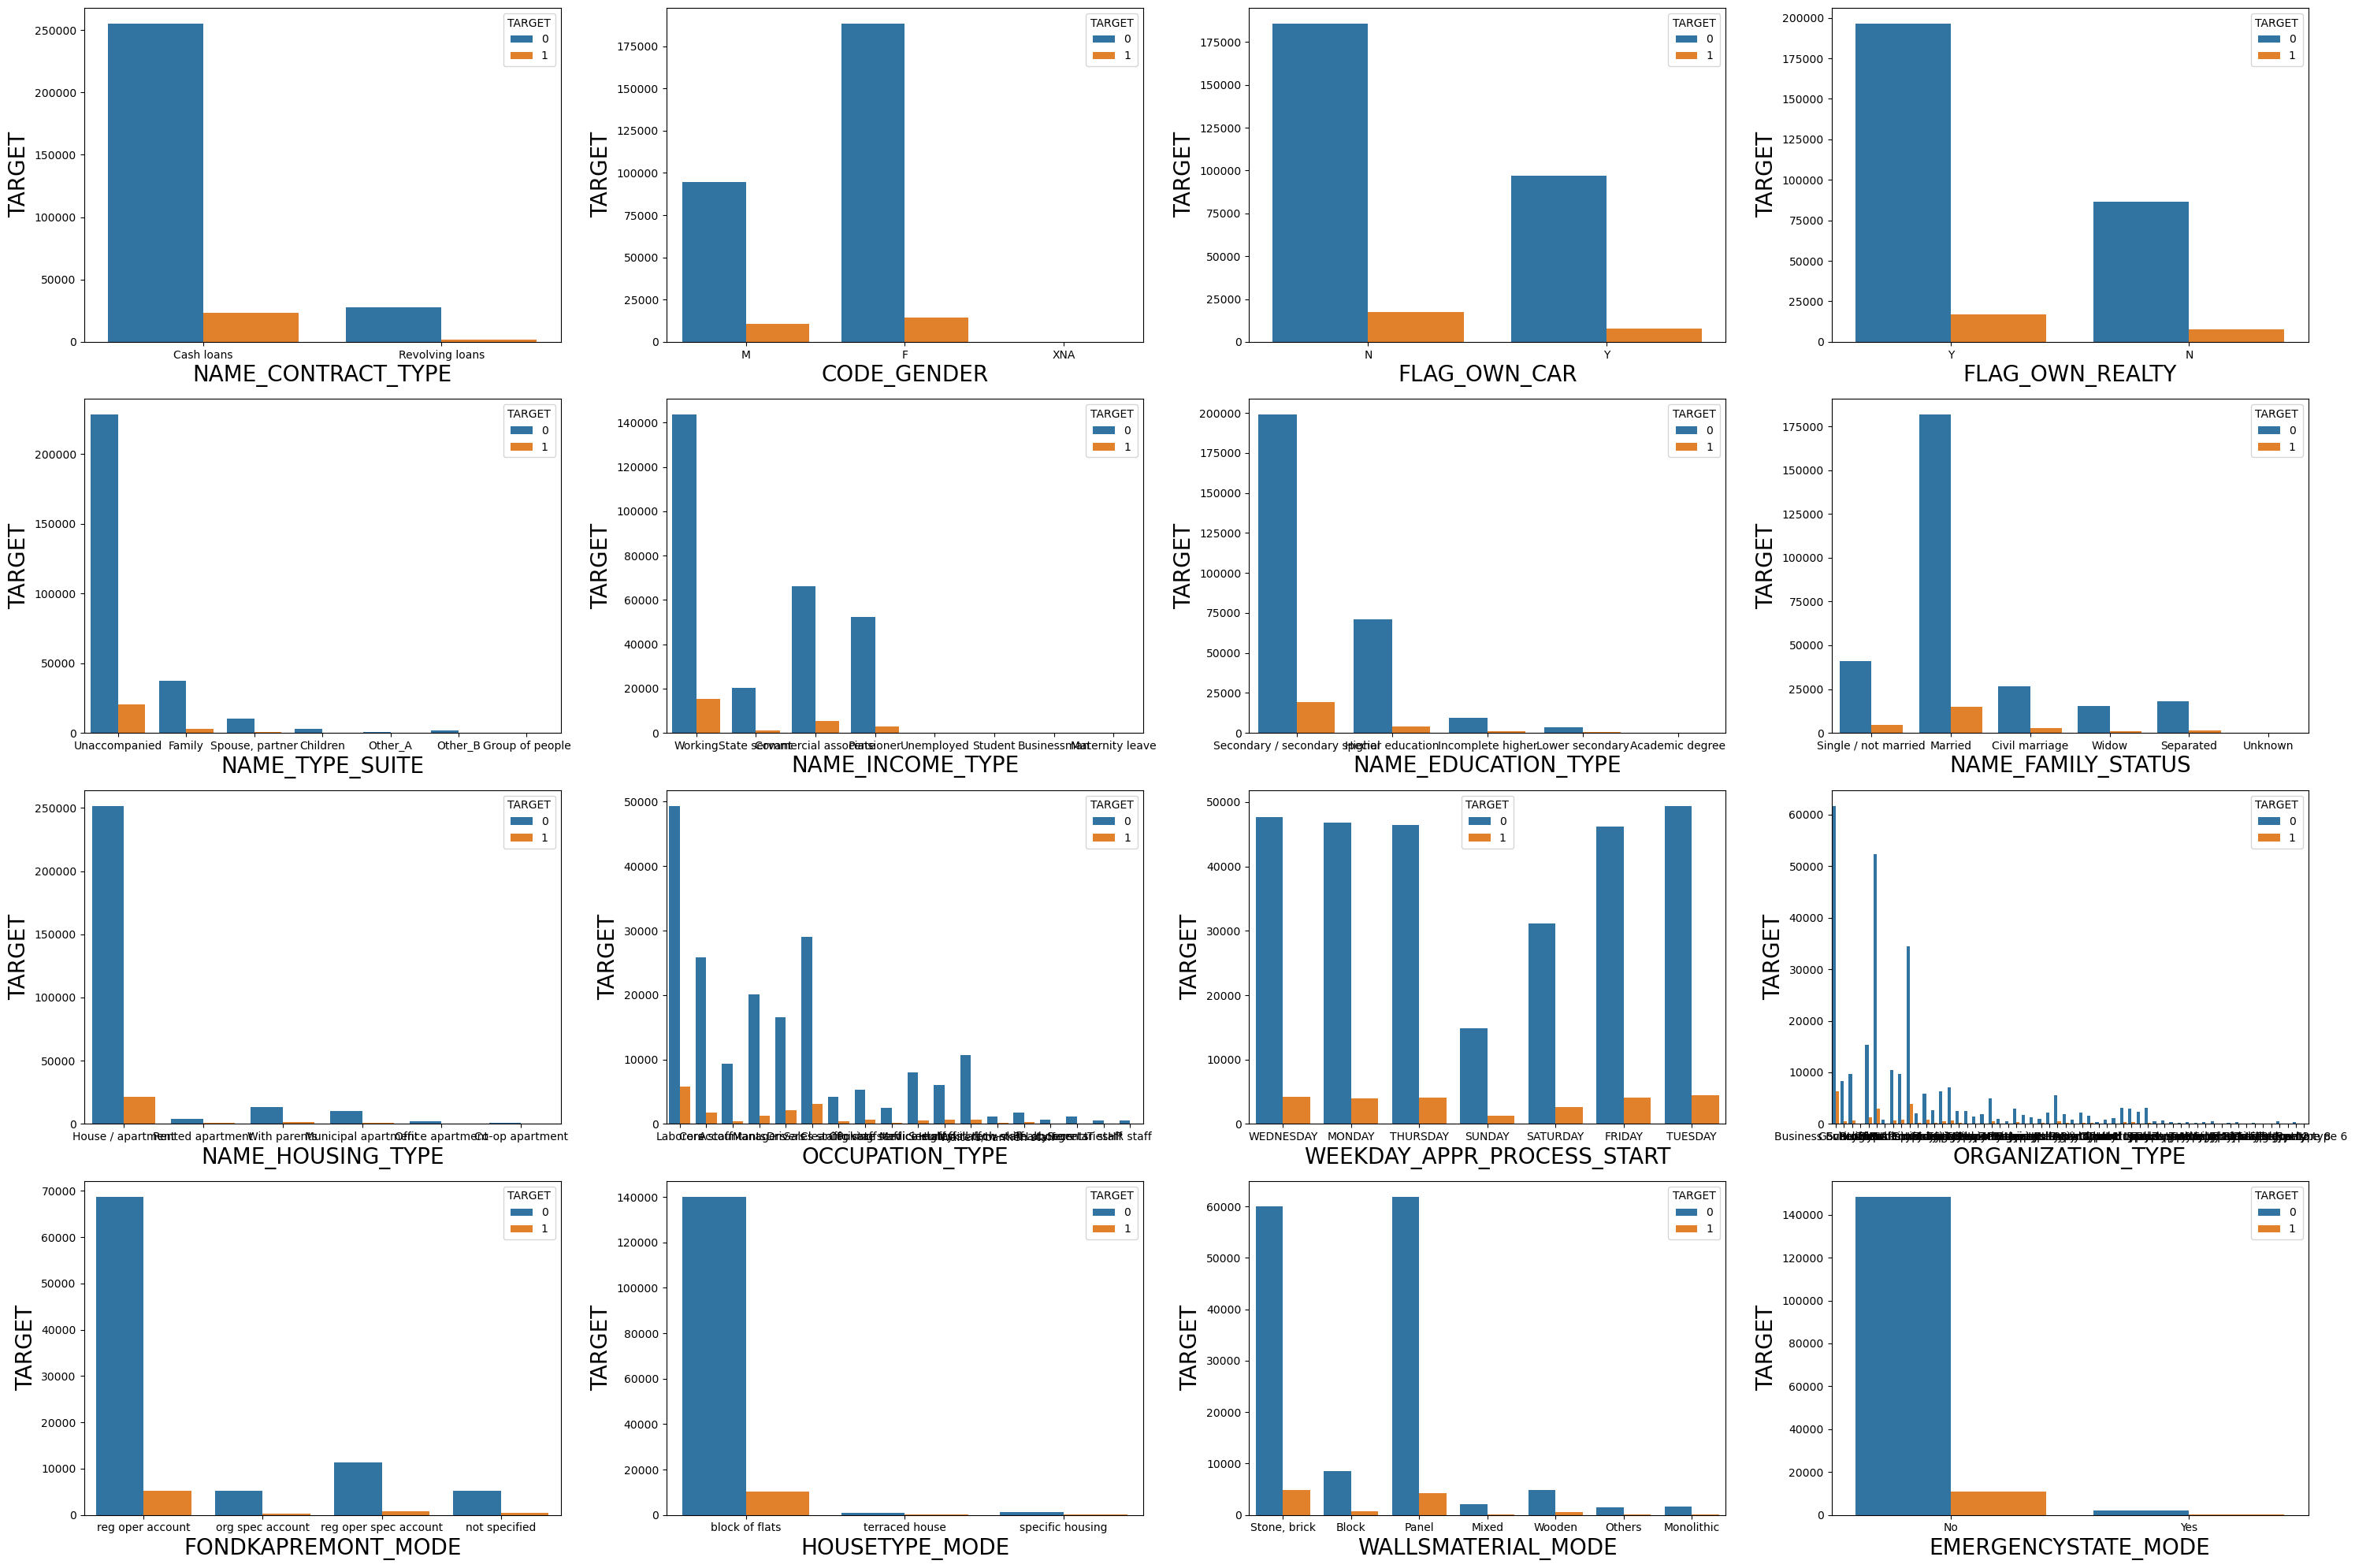

In [14]:
#Bivariate Analysis
#For categorical data
plt.figure(figsize=(30,20), facecolor='white')
plotnumber = 1

for column in categorical_data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=categorical_data[column]
                        ,hue=d1.TARGET)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('TARGET',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Insights:


NAME_CONTRACT_TYPE:
-Most of the clients have applied for Cash Loan while very small proportion have applied for Revolving loan for both Defaulters as well as Non-defaulters.

CODE_GENDER: 
-Most of the female client are non defaulters compared to male.

FLAG_OWN_CAR:
-The client owns a car applied for loan are most of them are non defaulters

FLAG_OWN_REALTY:
-The client owns a house or flat applied for loan are non defaulters

NAME_TYPE_SUITE :
-Most of the clients were accompanied while applying for the loan.And with few clients a family member was accompanying for both Defaulters and Non-Defaulters.
-But who was accompanying client while applying for the loan doesn't impact on the default.Also both the populations have same proportions.

NAME_INCOME_TYPE:
-Clients who applied for loans were getting income by Working,Commercial associate and Pensioner are more likely to apply for the loan, highest being the Working class category .
-Businessman, students and Unemployedless likely to apply for loan .
-Working category have high risk to default.
-State Servant is at Minimal risk to default.

NAME_EDUCATION_TYPE:
-Clients having education Secondary or Secondary Special are more likey to apply for the loan.
-Clients having education Secondary or Secondary Special have higher risk to default.Other education types have minimal risk.

NAME_FAMILY_STATUS :
-Married Clients seems to be applied most for the loan compared to others for both Defaulters and Non-Defaulters.
-In case of Defaulters,Clients having single relationship are less risky
-In case of Defaulters, Widows shows Minimal risk.

NAME_HOUSING_TYPE:
-Most of the clients own a house or living in a apartment for both Defaulters and Non-Defaulters.

OCCUPATION_TYPE:
-Pensioners have applied the most for the loan in case of Defaulters and Non-Defaulters.
-Pensioner being highest followed by laborers have high risk to default.

WEEKDAY_APPR_PROCESS_START:
-There is no considerable difference in days for both Defaulters and Non-defaulters.

ORGANIZATION_TYPE:
ype of organization where client works

FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE:
-All these columns gives Information about building where client lives
-Where its give details about what is the modus, number of entrances, state of the building,number of floor,etc. who applied for loan are most of them are non defaulters


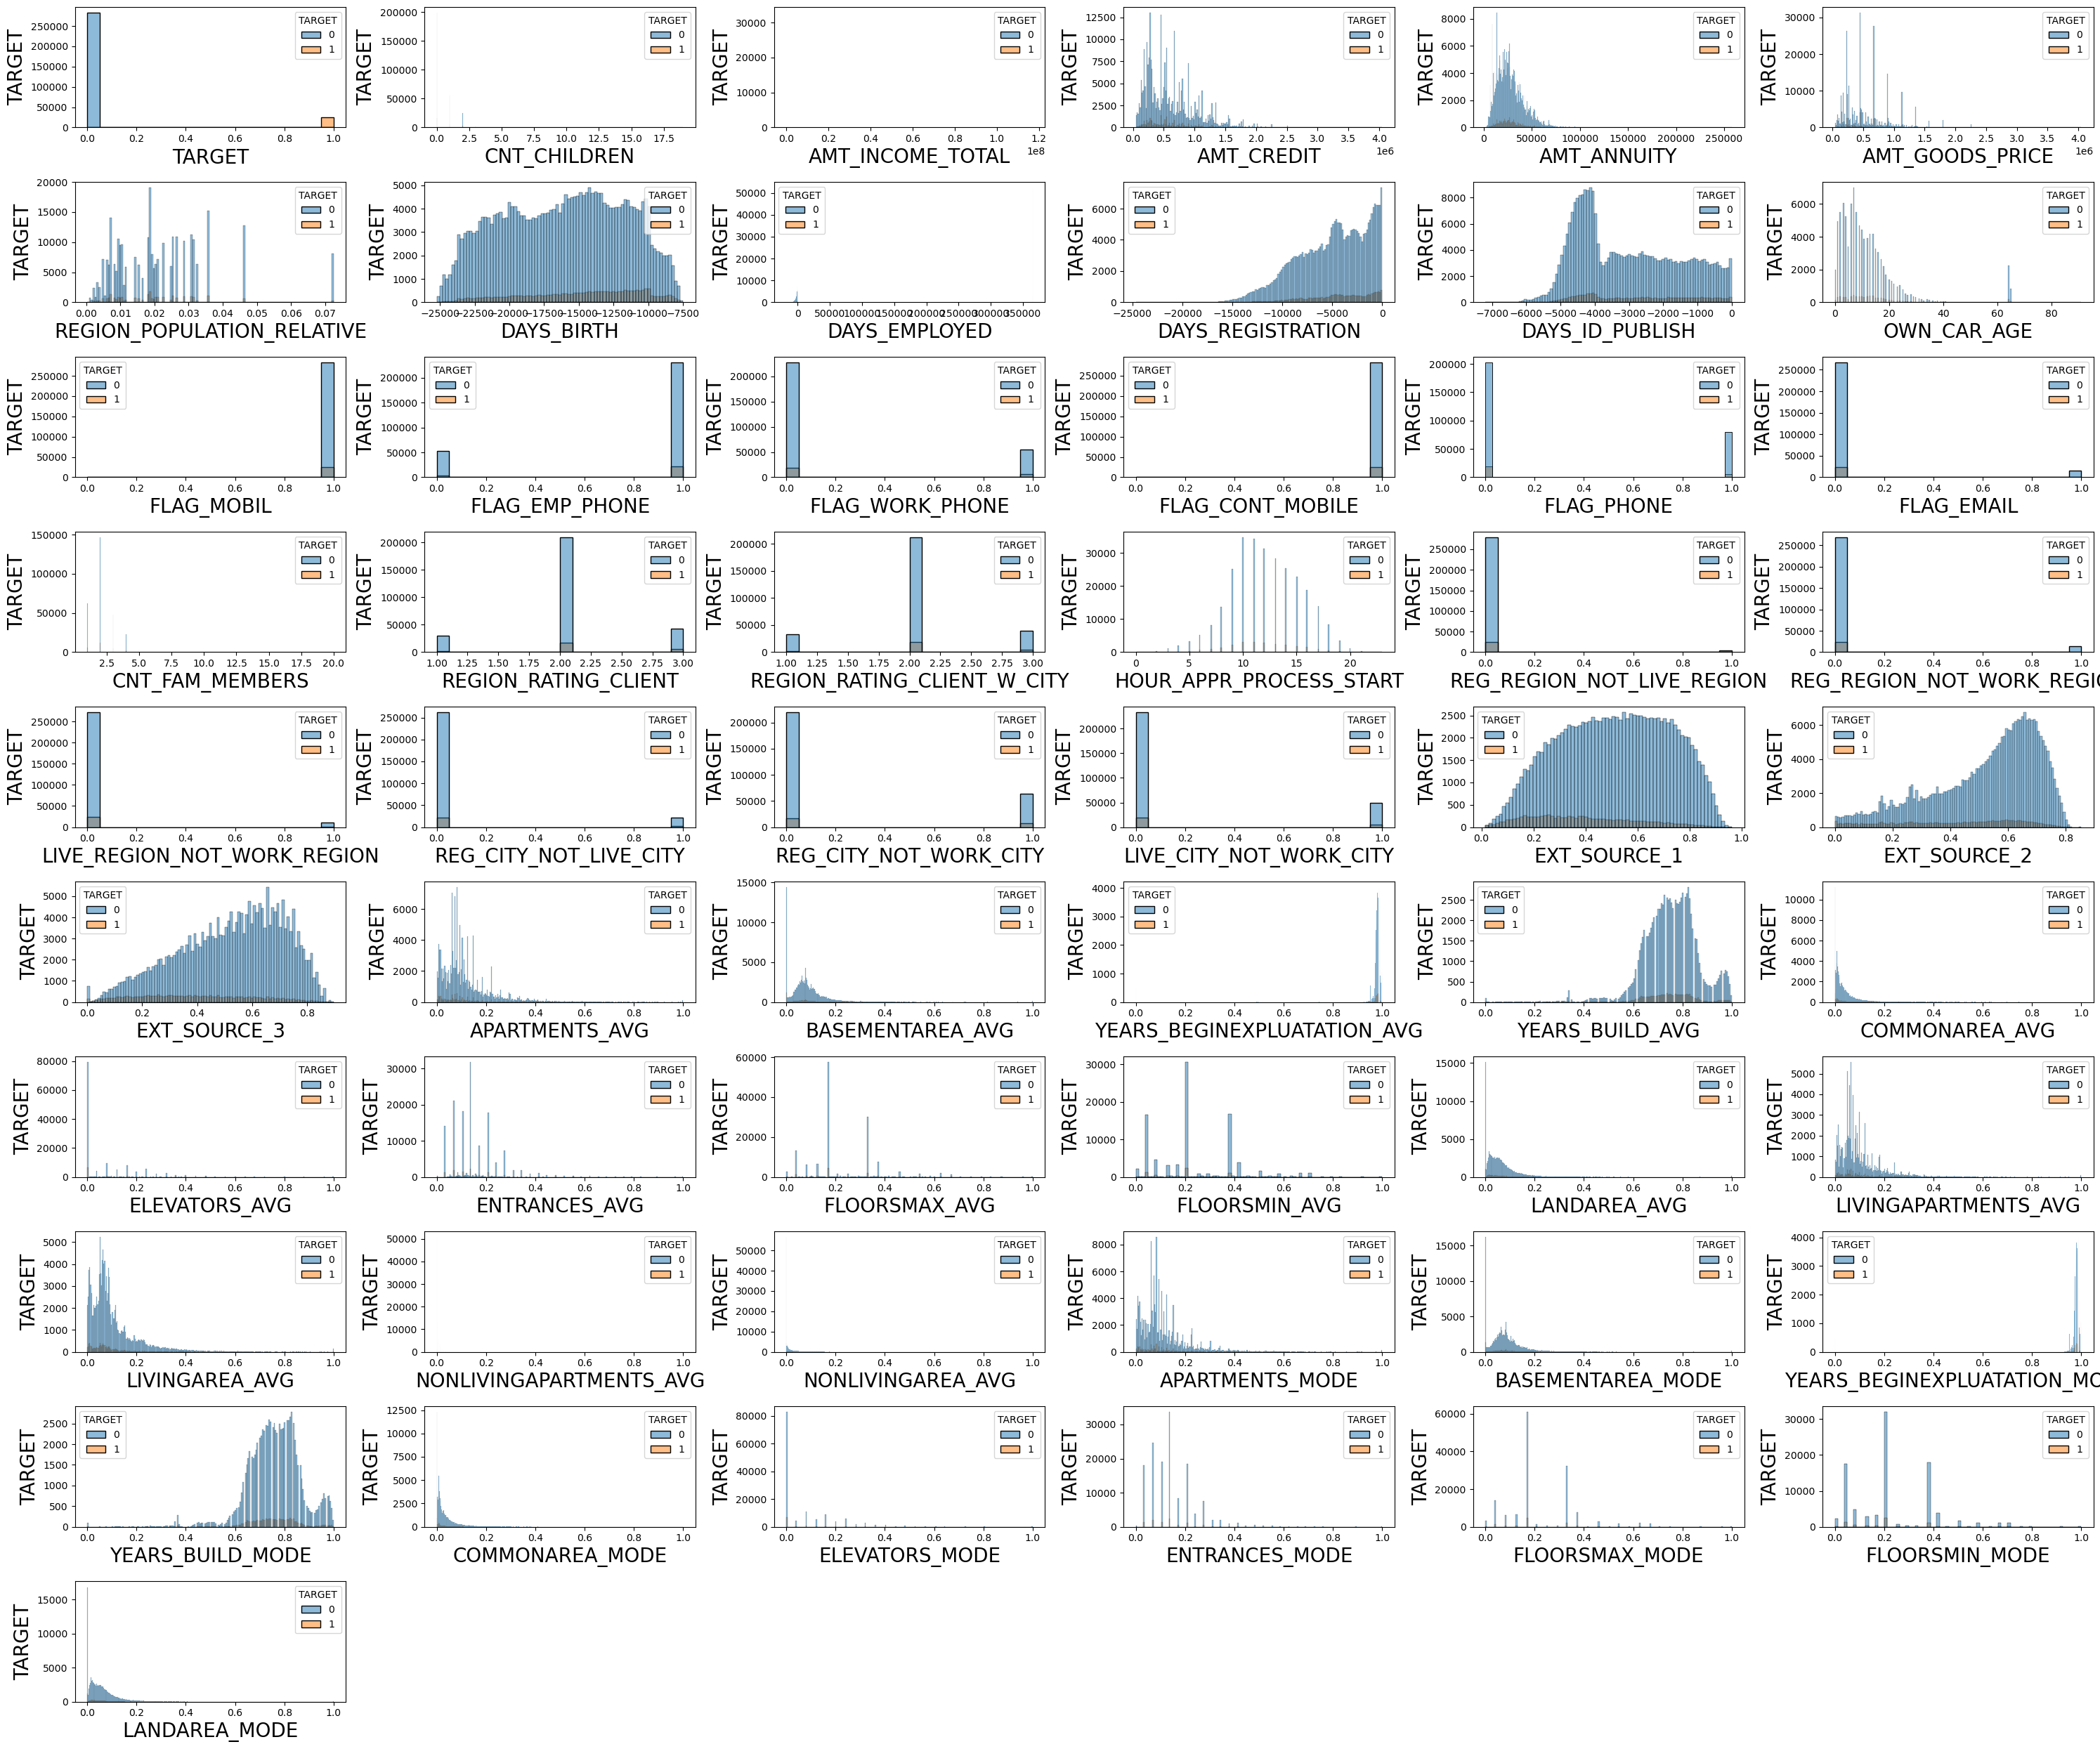

In [15]:
#For numerical data n1
plt.figure(figsize=(30,25), facecolor='white')
plotnumber = 1

for column in n1:
    if plotnumber<=55 :
        ax = plt.subplot(10,6,plotnumber)
        sns.histplot(x=n1[column]         
                        ,hue=d1.TARGET)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('TARGET',fontsize=20)
    plotnumber+=1
plt.tight_layout()

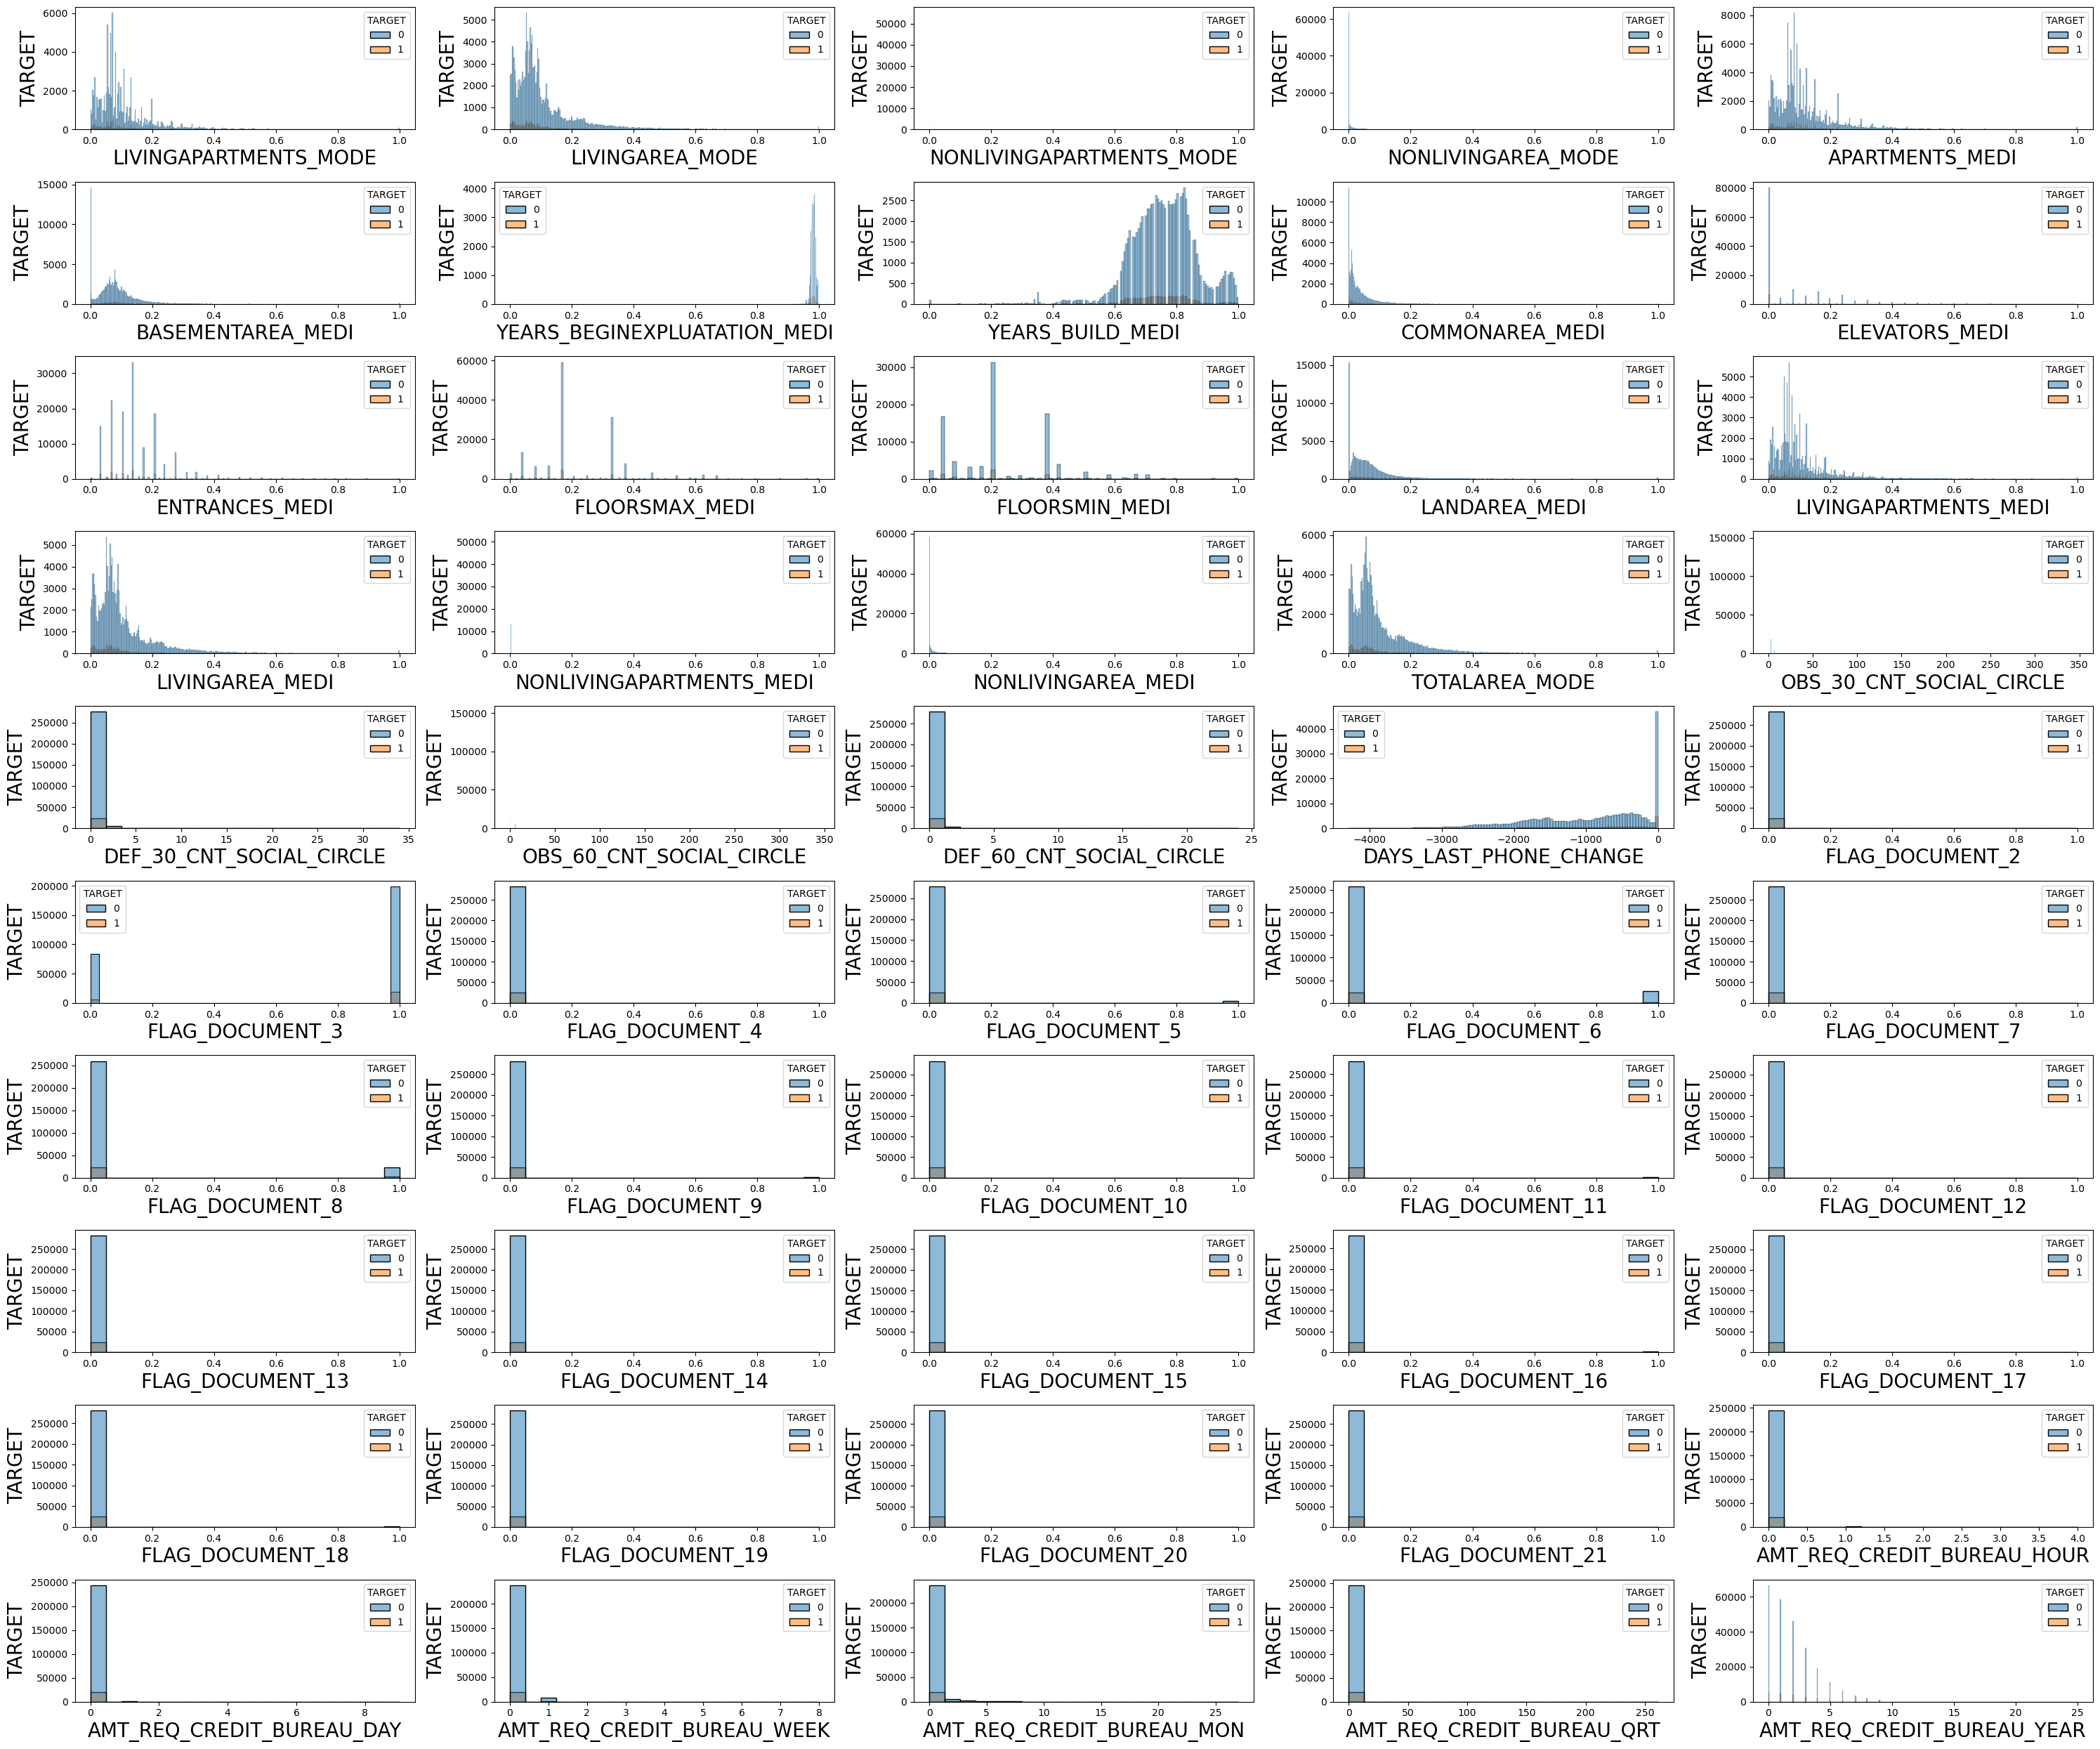

In [16]:
 #For Numerical Data n2
plt.figure(figsize=(30,25), facecolor='white') 
plotnumber = 1

for column in n2:
    if plotnumber<=50 :
        ax = plt.subplot(10,5,plotnumber)
        sns.histplot(x=n2[column]         
                        ,hue=d1.TARGET)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('TARGET',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
#Multivariate Aalysis

sns.pairplot(d1)
#Takes too much time to laod

In [ ]:
#Aalysis for others csv files: It takes too much time to execute the cell for other csv files

<Axes: xlabel='TARGET', ylabel='count'>

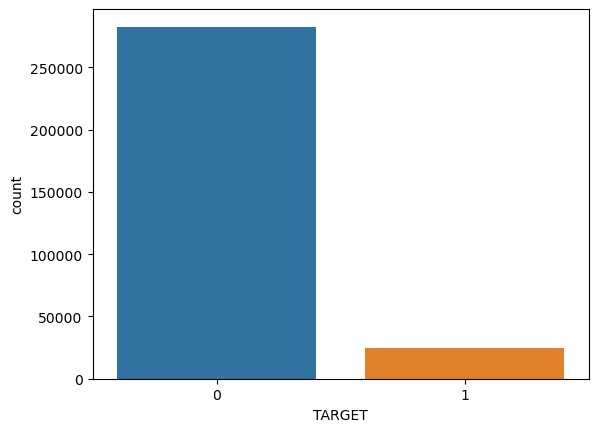

In [37]:
#Check for the data is balanced or not
sns.countplot(x=d1.TARGET)

Insight:

-The number of non-defaulter is much higher than those that are defaulter.
Therefore the data is not balanced.

-Where, 1:Defaulter & 0:Not Defaulter

-As the dataset is imbalanced, We have to handle it.

# Data Preprocessing

In [38]:
#check for missing values
d1.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 121, dtype: int64

In [39]:
##column names for missing values
d1.columns[d1.isnull().any()]


Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [40]:
categorical_data.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [41]:
#Handling missing values

#length of data
len(d1)

307511

In [42]:
#If % of missing values is > 80% then we are going to drop that column, else handle the missing values
isnull=d1.isnull().sum()/len(d1)*100
isnull

TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 121, dtype: float64

In [43]:
isnull.tolist() #check for all the columns

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.003902299429939092,
 0.09040327012692229,
 0.42014757195677555,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 65.9908100848425,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 31.345545362604916,
 0.0006503832383231819,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 56.381072546998325,
 0.21462646864665005,
 19.825307062186393,
 50.74972927797705,
 58.51595552679416,
 48.781019215572776,
 66.49778381911543,
 69.87229725115525,
 53.29597965601231,
 50.3487680115508,
 49.76082156410665,
 67.84862980511267,
 59.376737742714894,
 68.35495315614726,
 50.193326417591564,
 69.43296337366793,
 55.17916432257708,
 50.74972927797705,
 58.51595552679416,
 48.781019215572776,
 66.49778381911543,
 69.87229725115525,
 53.29597965601231,
 50.3487680115508,
 49.76082156410665,
 67.84862980511267,
 59.376737742714894,
 68.35495315614726,
 50.193326417591564,
 69.43296337366793,
 55.17916432257708,
 50.74972927797705,
 58.5159555267941

In [44]:
#there is no column that gives % of missing values > 80% , so handle the missing values for all missing value columns

In [45]:
#Handle the missing values in categorical columns
#replace missing values with mode


In [ ]:
#NAME_TYPE_SUITE

In [46]:
#calculate mode first
d1['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [47]:
d1.loc[d1['NAME_TYPE_SUITE'].isnull()==True,'NAME_TYPE_SUITE']='Unaccompanied'   # here Unaccompanied is mode

In [48]:
#OCCUPATION_TYPE

In [49]:
#calculate mode first
d1['OCCUPATION_TYPE'].mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [50]:
d1.loc[d1['OCCUPATION_TYPE'].isnull()==True,'OCCUPATION_TYPE']='Laborers'   # here Laborers is mode

In [51]:
#FONDKAPREMONT_MODE

In [52]:
#calculate mode first
d1['FONDKAPREMONT_MODE'].mode()

0    reg oper account
Name: FONDKAPREMONT_MODE, dtype: object

In [53]:
d1.loc[d1['FONDKAPREMONT_MODE'].isnull()==True,'FONDKAPREMONT_MODE']='reg oper account'   # here reg oper account is mode

In [54]:
#WALLSMATERIAL_MODE

In [55]:
#calculate mode first
d1['WALLSMATERIAL_MODE'].mode()

0    Panel
Name: WALLSMATERIAL_MODE, dtype: object

In [56]:
d1.loc[d1['WALLSMATERIAL_MODE'].isnull()==True,'WALLSMATERIAL_MODE']='Panel'   # here Panel is mode

In [57]:
#EMERGENCYSTATE_MODE

In [58]:
#calculate mode first
d1['EMERGENCYSTATE_MODE'].mode()

0    No
Name: EMERGENCYSTATE_MODE, dtype: object

In [59]:
d1.loc[d1['EMERGENCYSTATE_MODE'].isnull()==True,'EMERGENCYSTATE_MODE']='No'   # here No is mode

In [60]:
#HOUSETYPE_MODE
d1['HOUSETYPE_MODE'].mode()

0    block of flats
Name: HOUSETYPE_MODE, dtype: object

In [61]:
d1.loc[d1['HOUSETYPE_MODE'].isnull()==True,'HOUSETYPE_MODE']='block of flats'   # here block of flats is mode

In [29]:
#Handle the missing values of numerical columns

In [23]:
#Check for distribution whether its normal or not , if not normal replace missing values by median
#From EDA we can observed that there is no normal distribution for any numerical columns so handle these columns by replacing missing values by median

In [62]:
d1.loc[d1['AMT_ANNUITY'].isnull()==True,'AMT_ANNUITY']=d1['AMT_ANNUITY'].median()

In [63]:
d1.loc[d1['AMT_GOODS_PRICE'].isnull()==True,'AMT_GOODS_PRICE']=d1['AMT_GOODS_PRICE'].median()

In [64]:
d1.loc[d1['OWN_CAR_AGE'].isnull()==True,'OWN_CAR_AGE']=d1['OWN_CAR_AGE'].median()

In [65]:
d1.loc[d1['CNT_FAM_MEMBERS'].isnull()==True,'CNT_FAM_MEMBERS']=d1['CNT_FAM_MEMBERS'].median()

In [66]:
d1.loc[d1['EXT_SOURCE_1'].isnull()==True,'EXT_SOURCE_1']=d1['EXT_SOURCE_1'].median()

In [67]:
d1.loc[d1['EXT_SOURCE_2'].isnull()==True,'EXT_SOURCE_2']=d1['EXT_SOURCE_2'].median()

In [68]:
d1.loc[d1['EXT_SOURCE_3'].isnull()==True,'EXT_SOURCE_3']=d1['EXT_SOURCE_3'].median()

In [69]:
d1.loc[d1['APARTMENTS_AVG'].isnull()==True,'APARTMENTS_AVG']=d1['APARTMENTS_AVG'].median()

In [70]:
d1.loc[d1['BASEMENTAREA_AVG'].isnull()==True,'BASEMENTAREA_AVG']=d1['BASEMENTAREA_AVG'].median()

In [71]:
d1.loc[d1['YEARS_BEGINEXPLUATATION_AVG'].isnull()==True,'YEARS_BEGINEXPLUATATION_AVG']=d1['YEARS_BEGINEXPLUATATION_AVG'].median()

In [72]:
d1.loc[d1['YEARS_BUILD_AVG'].isnull()==True,'YEARS_BUILD_AVG']=d1['YEARS_BUILD_AVG'].median()

In [73]:
d1.loc[d1['COMMONAREA_AVG'].isnull()==True,'COMMONAREA_AVG']=d1['COMMONAREA_AVG'].median()

In [74]:
d1.loc[d1['ELEVATORS_AVG'].isnull()==True,'ELEVATORS_AVG']=d1['ELEVATORS_AVG'].median()

In [75]:
d1.loc[d1['ENTRANCES_AVG'].isnull()==True,'ENTRANCES_AVG']=d1['ENTRANCES_AVG'].median()

In [76]:
d1.loc[d1['FLOORSMAX_AVG'].isnull()==True,'FLOORSMAX_AVG']=d1['FLOORSMAX_AVG'].median()

In [77]:
d1.loc[d1['FLOORSMIN_AVG'].isnull()==True,'FLOORSMIN_AVG']=d1['FLOORSMIN_AVG'].median()

In [78]:
d1.loc[d1['LANDAREA_AVG'].isnull()==True,'LANDAREA_AVG']=d1['LANDAREA_AVG'].median()

In [79]:
d1.loc[d1['LIVINGAPARTMENTS_AVG'].isnull()==True,'LIVINGAPARTMENTS_AVG']=d1['LIVINGAPARTMENTS_AVG'].median()

In [80]:
d1.loc[d1['LIVINGAREA_AVG'].isnull()==True,'LIVINGAREA_AVG']=d1['LIVINGAREA_AVG'].median()

In [81]:
d1.loc[d1['NONLIVINGAPARTMENTS_AVG'].isnull()==True,'NONLIVINGAPARTMENTS_AVG']=d1['NONLIVINGAPARTMENTS_AVG'].median()

In [82]:
d1.loc[d1['NONLIVINGAREA_AVG'].isnull()==True,'NONLIVINGAREA_AVG']=d1['NONLIVINGAREA_AVG'].median()

In [83]:
d1.loc[d1['APARTMENTS_MODE'].isnull()==True,'APARTMENTS_MODE']=d1['APARTMENTS_MODE'].median()

In [84]:
d1.loc[d1['BASEMENTAREA_MODE'].isnull()==True,'BASEMENTAREA_MODE']=d1['BASEMENTAREA_MODE'].median()

In [85]:
d1.loc[d1['YEARS_BEGINEXPLUATATION_MODE'].isnull()==True,'YEARS_BEGINEXPLUATATION_MODE']=d1['YEARS_BEGINEXPLUATATION_MODE'].median()

In [86]:
d1.loc[d1['YEARS_BUILD_MODE'].isnull()==True,'YEARS_BUILD_MODE']=d1['YEARS_BUILD_MODE'].median()

In [87]:
d1.loc[d1['COMMONAREA_MODE'].isnull()==True,'COMMONAREA_MODE']=d1['COMMONAREA_MODE'].median()

In [88]:
d1.loc[d1['ELEVATORS_MODE'].isnull()==True,'ELEVATORS_MODE']=d1['ELEVATORS_MODE'].median()

In [89]:
d1.loc[d1['ENTRANCES_MODE'].isnull()==True,'ENTRANCES_MODE']=d1['ENTRANCES_MODE'].median()

In [90]:
d1.loc[d1['FLOORSMAX_MODE'].isnull()==True,'FLOORSMAX_MODE']=d1['FLOORSMAX_MODE'].median()

In [91]:
d1.loc[d1['FLOORSMIN_MODE'].isnull()==True,'FLOORSMIN_MODE']=d1['FLOORSMIN_MODE'].median()

In [92]:
d1.loc[d1['LANDAREA_MODE'].isnull()==True,'LANDAREA_MODE']=d1['LANDAREA_MODE'].median()

In [93]:
d1.loc[d1['LIVINGAPARTMENTS_MODE'].isnull()==True,'LIVINGAPARTMENTS_MODE']=d1['LIVINGAPARTMENTS_MODE'].median()

In [94]:
d1.loc[d1['LIVINGAREA_MODE'].isnull()==True,'LIVINGAREA_MODE']=d1['LIVINGAREA_MODE'].median()

In [95]:
d1.loc[d1['NONLIVINGAPARTMENTS_MODE'].isnull()==True,'NONLIVINGAPARTMENTS_MODE']=d1['NONLIVINGAPARTMENTS_MODE'].median()

In [96]:
d1.loc[d1['NONLIVINGAREA_MODE'].isnull()==True,'NONLIVINGAREA_MODE']=d1['NONLIVINGAREA_MODE'].median()

In [97]:
d1.loc[d1['APARTMENTS_MEDI'].isnull()==True,'APARTMENTS_MEDI']=d1['APARTMENTS_MEDI'].median()

In [98]:
d1.loc[d1['BASEMENTAREA_MEDI'].isnull()==True,'BASEMENTAREA_MEDI']=d1['BASEMENTAREA_MEDI'].median()

In [99]:
d1.loc[d1['YEARS_BEGINEXPLUATATION_MEDI'].isnull()==True,'YEARS_BEGINEXPLUATATION_MEDI']=d1['YEARS_BEGINEXPLUATATION_MEDI'].median()

In [100]:
d1.loc[d1['YEARS_BUILD_MEDI'].isnull()==True,'YEARS_BUILD_MEDI']=d1['YEARS_BUILD_MEDI'].median()

In [101]:
d1.loc[d1['COMMONAREA_MEDI'].isnull()==True,'COMMONAREA_MEDI']=d1['COMMONAREA_MEDI'].median()

In [102]:
d1.loc[d1['ELEVATORS_MEDI'].isnull()==True,'ELEVATORS_MEDI']=d1['ELEVATORS_MEDI'].median()

In [103]:
d1.loc[d1['ENTRANCES_MEDI'].isnull()==True,'ENTRANCES_MEDI']=d1['ENTRANCES_MEDI'].median()

In [104]:
d1.loc[d1['FLOORSMAX_MEDI'].isnull()==True,'FLOORSMAX_MEDI']=d1['FLOORSMAX_MEDI'].median()

In [105]:
d1.loc[d1['FLOORSMIN_MEDI'].isnull()==True,'FLOORSMIN_MEDI']=d1['FLOORSMIN_MEDI'].median()

In [106]:
d1.loc[d1['LANDAREA_MEDI'].isnull()==True,'LANDAREA_MEDI']=d1['LANDAREA_MEDI'].median()

In [107]:
d1.loc[d1['LIVINGAPARTMENTS_MEDI'].isnull()==True,'LIVINGAPARTMENTS_MEDI']=d1['LIVINGAPARTMENTS_MEDI'].median()

In [108]:
d1.loc[d1['LIVINGAREA_MEDI'].isnull()==True,'LIVINGAREA_MEDI']=d1['LIVINGAREA_MEDI'].median()

In [109]:
d1.loc[d1['NONLIVINGAPARTMENTS_MEDI'].isnull()==True,'NONLIVINGAPARTMENTS_MEDI']=d1['NONLIVINGAPARTMENTS_MEDI'].median()

In [110]:
d1.loc[d1['NONLIVINGAREA_MEDI'].isnull()==True,'NONLIVINGAREA_MEDI']=d1['NONLIVINGAREA_MEDI'].median()

In [111]:
d1.loc[d1['TOTALAREA_MODE'].isnull()==True,'TOTALAREA_MODE']=d1['TOTALAREA_MODE'].median()

In [112]:
d1.loc[d1['OBS_30_CNT_SOCIAL_CIRCLE'].isnull()==True,'OBS_30_CNT_SOCIAL_CIRCLE']=d1['OBS_30_CNT_SOCIAL_CIRCLE'].median()

In [113]:
d1.loc[d1['DEF_30_CNT_SOCIAL_CIRCLE'].isnull()==True,'DEF_30_CNT_SOCIAL_CIRCLE']=d1['DEF_30_CNT_SOCIAL_CIRCLE'].median()

In [114]:
d1.loc[d1['OBS_60_CNT_SOCIAL_CIRCLE'].isnull()==True,'OBS_60_CNT_SOCIAL_CIRCLE']=d1['OBS_60_CNT_SOCIAL_CIRCLE'].median()

In [115]:
d1.loc[d1['DEF_60_CNT_SOCIAL_CIRCLE'].isnull()==True,'DEF_60_CNT_SOCIAL_CIRCLE']=d1['DEF_60_CNT_SOCIAL_CIRCLE'].median()

In [116]:
d1.loc[d1['DAYS_LAST_PHONE_CHANGE'].isnull()==True,'DAYS_LAST_PHONE_CHANGE']=d1['DAYS_LAST_PHONE_CHANGE'].median()

In [117]:
d1.loc[d1['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull()==True,'AMT_REQ_CREDIT_BUREAU_HOUR']=d1['AMT_REQ_CREDIT_BUREAU_HOUR'].median()

In [118]:
d1.loc[d1['AMT_REQ_CREDIT_BUREAU_DAY'].isnull()==True,'AMT_REQ_CREDIT_BUREAU_DAY']=d1['AMT_REQ_CREDIT_BUREAU_DAY'].median()

In [119]:
d1.loc[d1['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull()==True,'AMT_REQ_CREDIT_BUREAU_WEEK']=d1['AMT_REQ_CREDIT_BUREAU_WEEK'].median()

In [120]:
d1.loc[d1['AMT_REQ_CREDIT_BUREAU_MON'].isnull()==True,'AMT_REQ_CREDIT_BUREAU_MON']=d1['AMT_REQ_CREDIT_BUREAU_MON'].median()

In [121]:
d1.loc[d1['AMT_REQ_CREDIT_BUREAU_QRT'].isnull()==True,'AMT_REQ_CREDIT_BUREAU_QRT']=d1['AMT_REQ_CREDIT_BUREAU_QRT'].median()

In [122]:
d1.loc[d1['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull()==True,'AMT_REQ_CREDIT_BUREAU_YEAR']=d1['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

In [123]:
#Check
d1.head(pd.set_option('display.max_columns',None))

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0            1         Cash loans           M            N               Y   
1            0         Cash loans           F            N               N   
2            0    Revolving loans           M            Y               Y   
3            0         Cash loans           F            N               Y   
4            0         Cash loans           M            N               Y   
...        ...                ...         ...          ...             ...   
307506       0         Cash loans           M            N               N   
307507       0         Cash loans           F            N               Y   
307508       0         Cash loans           F            N               Y   
307509       1         Cash loans           F            N               Y   
307510       0         Cash loans           F            N               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0              351000.0   Unaccompanied               Working   
1             1129500.0          Family         State servant   
2              135000.0   Unaccompanied               Working   
3              297000.0   Unaccompanied               Working   
4              513000.0   Unaccompanied               Working   
...                 ...             ...                   ...   
307506         225000.0   Unaccompanied               Working   
307507         225000.0   Unaccompanied             Pensioner   
307508         585000.0   Unaccompanied               Working   
307509         319500.0   Unaccompanied  Commercial associate   
307510         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment                    0.025164      -20775   
307508  House / apartment                    0.005002      -14966   
307509  House / apartment             

In [124]:
#check for duplicates
d1.duplicated().sum()

0

<Axes: >

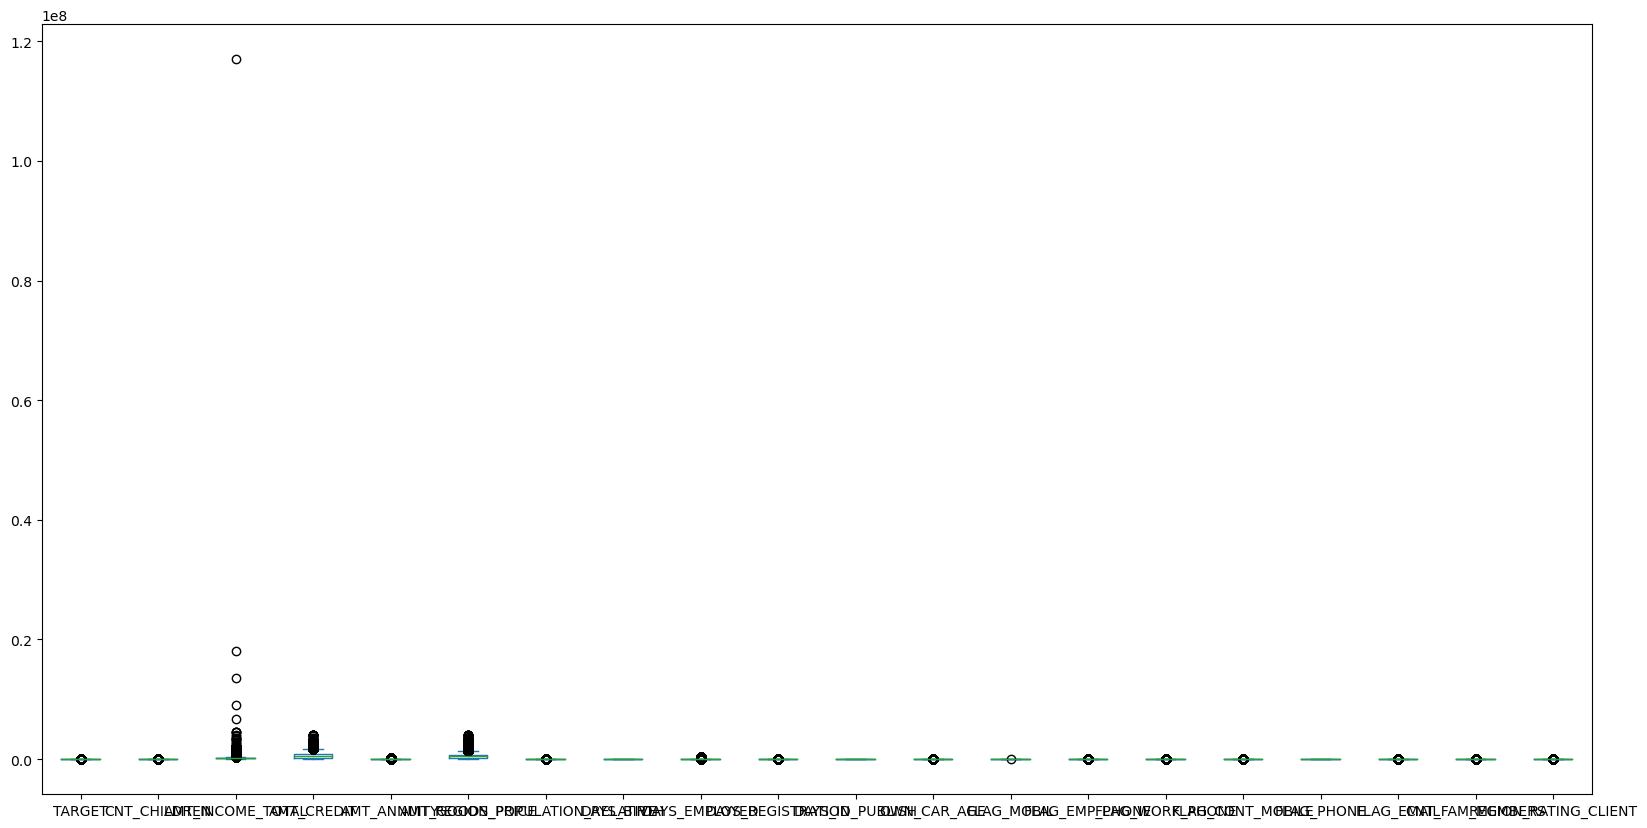

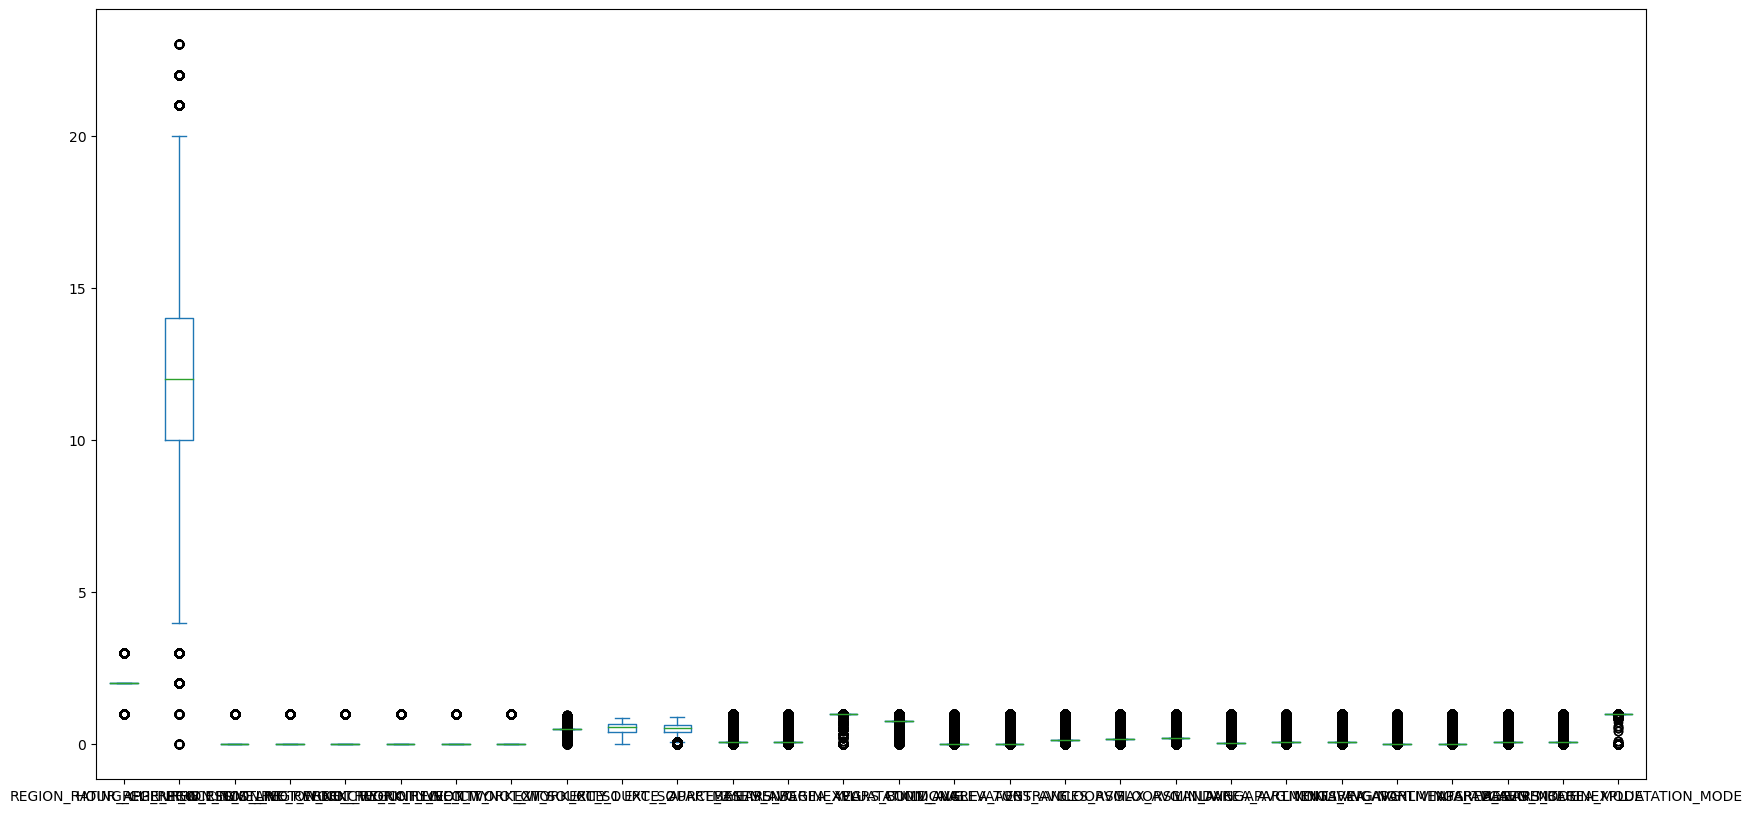

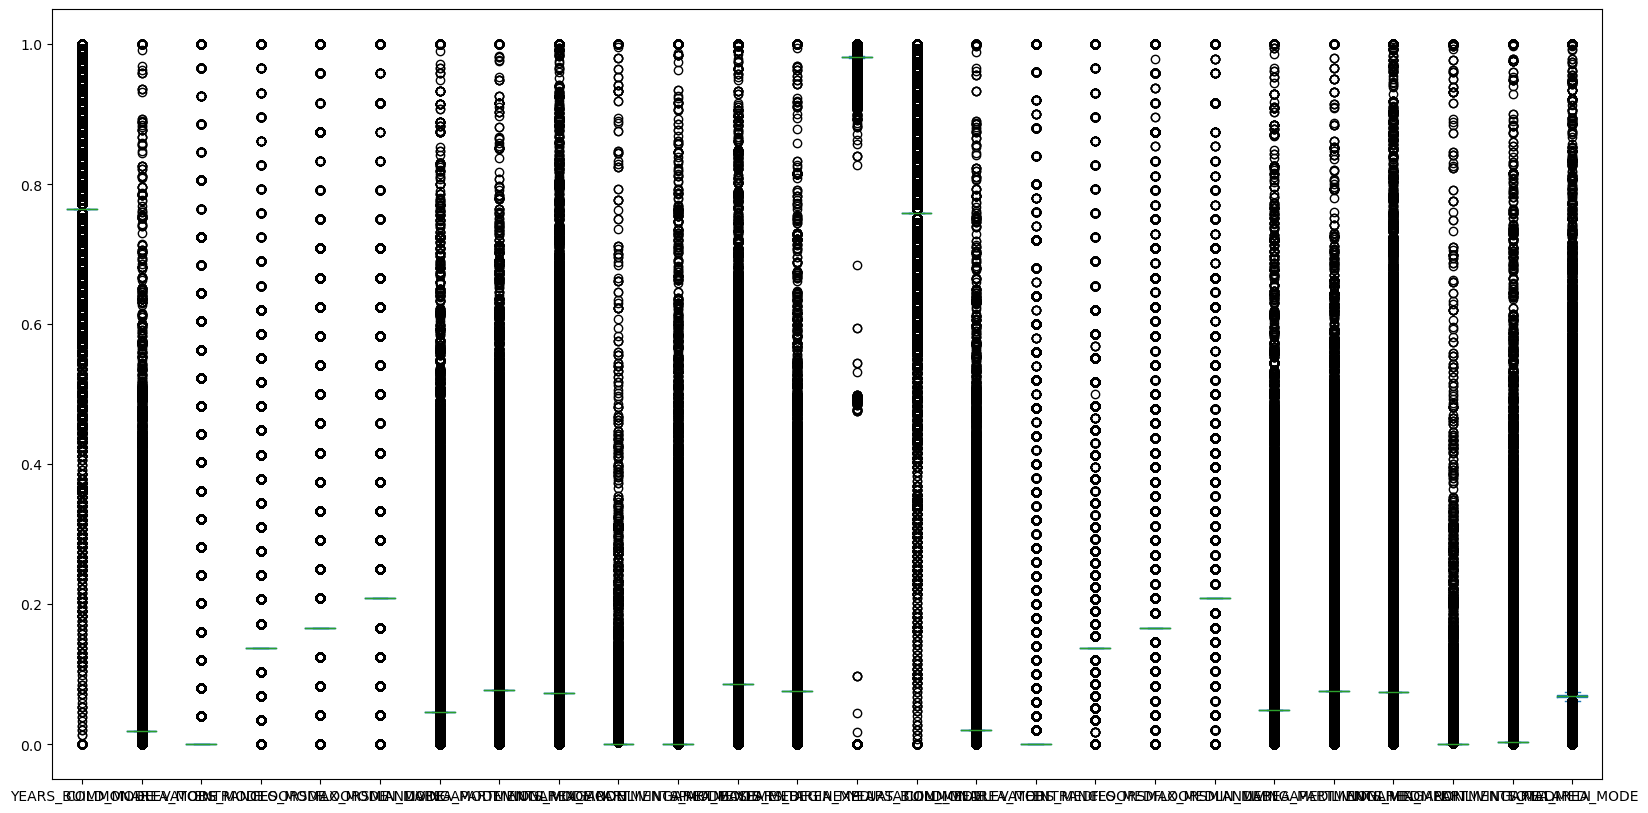

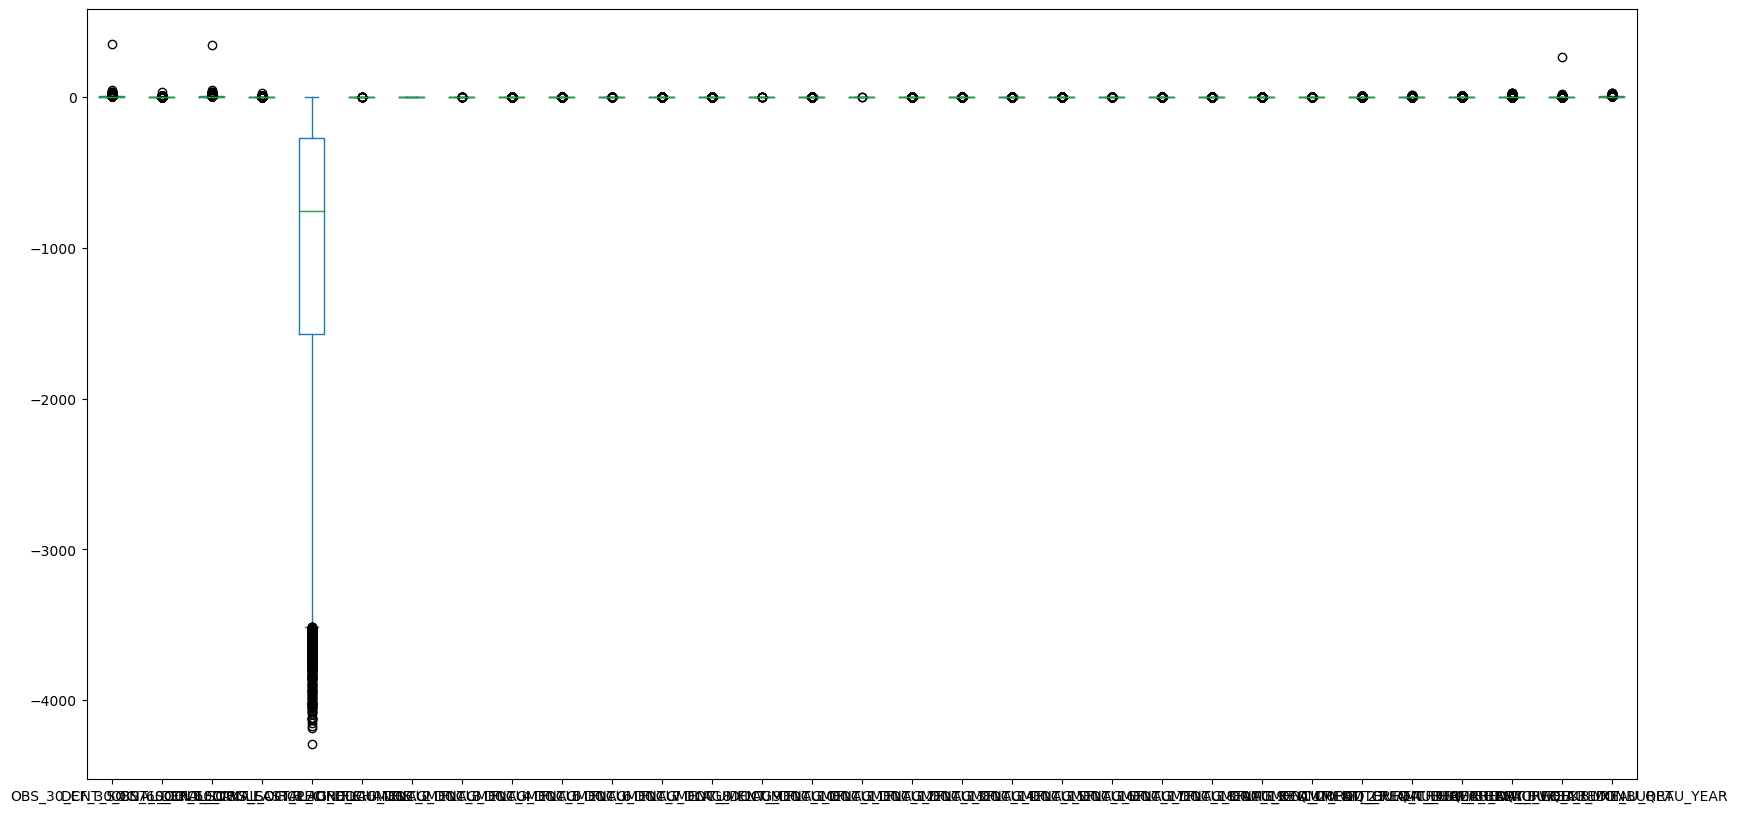

In [125]:
#Check for Outliers

d1.iloc[:, 0:30].plot(kind='box', figsize=[20,10])
d1.iloc[:, 30:60].plot(kind='box', figsize=[20,10])
d1.iloc[:, 60:90].plot(kind='box', figsize=[20,10])
d1.iloc[:, 90:].plot(kind='box', figsize=[20,10])

In [6]:
##Encoding:

#Coversion of categorical columns into numerical columns


In [126]:
#check for categorical column
d1.dtypes=='object'


TARGET                        False
NAME_CONTRACT_TYPE             True
CODE_GENDER                    True
FLAG_OWN_CAR                   True
FLAG_OWN_REALTY                True
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
Length: 121, dtype: bool

In [8]:
# we have 16 categorical column dataset.
 # NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE, WEEKDAY_APPR_PROCESS_START, ORGANIZATION_TYPE, FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE

In [127]:
#NAME_CONTRACT_TYPE
d1.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

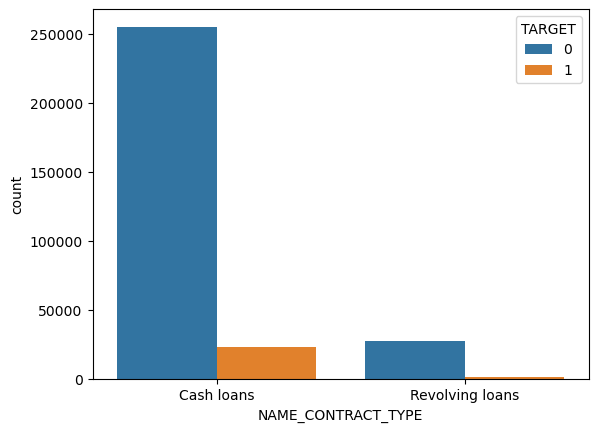

In [128]:
sns.countplot(x=d1.NAME_CONTRACT_TYPE,hue=d1.TARGET)

In [129]:
#Manual encoding
d1.NAME_CONTRACT_TYPE=d1.NAME_CONTRACT_TYPE.map({'Cash loans':1,'Revolving loans':0})

In [130]:
d1.head(3)

TARGET  NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1                   1           M            N               Y   
1       0                   1           F            N               N   
2       0                   0           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          9.0   
1      -16765          -1188            -1186.0             -291          9.0   
2      -19046           -225            -4260.0            -2531         26.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246      0.535276   
2              Government      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379   

   FLOORS

In [131]:
#CODE_GENDER
d1.CODE_GENDER.unique()

array(['M', 'F', 'XNA'], dtype=object)

In [132]:
d1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<Axes: xlabel='CODE_GENDER', ylabel='count'>

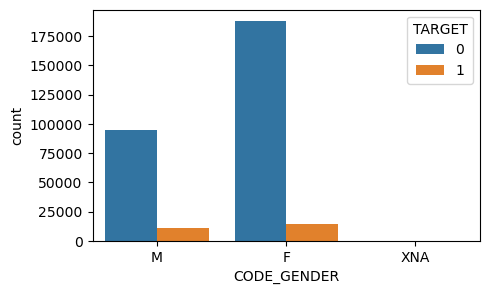

In [133]:
#Go with manual encoding for this col
plt.figure(figsize=(5,3))
sns.countplot(data=d1,x='CODE_GENDER',hue='TARGET')

In [134]:
#Manual encoding
d1.CODE_GENDER=d1.CODE_GENDER.map({'F':2,'M':1,'XNA':0})


In [135]:
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1                   1            1            N               Y   
1       0                   1            2            N               N   
2       0                   0            1            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          9.0   
1      -16765          -1188            -1186.0             -291          9.0   
2      -19046           -225            -4260.0            -2531         26.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246      0.535276   
2              Government      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379   

   FL

In [136]:
#FLAG_OWN_CAR
d1.FLAG_OWN_CAR.unique()

array(['N', 'Y'], dtype=object)

<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

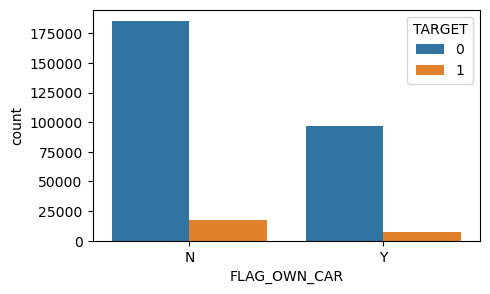

In [137]:
#Go with one hot encoding for this col
plt.figure(figsize=(5,3))
sns.countplot(data=d1,x='FLAG_OWN_CAR',hue='TARGET')

In [138]:
# Encoding FLAG_OWN_CAR by one hot encoding.
d1.FLAG_OWN_CAR=pd.get_dummies(d1.FLAG_OWN_CAR,drop_first=True)


In [139]:
#check
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1                   1            1             0               Y   
1       0                   1            2             0               N   
2       0                   0            1             1               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          9.0   
1      -16765          -1188            -1186.0             -291          9.0   
2      -19046           -225            -4260.0            -2531         26.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246      0.535276   
2              Government      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379   

 

In [140]:
#FLAG_OWN_REALTY
d1.FLAG_OWN_REALTY.unique()

array(['Y', 'N'], dtype=object)

<Axes: xlabel='FLAG_OWN_REALTY', ylabel='count'>

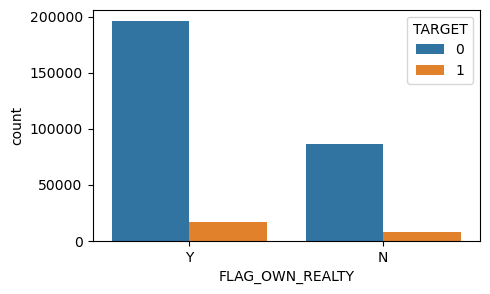

In [141]:
#Go with one hot encoding for this col
plt.figure(figsize=(5,3))
sns.countplot(data=d1,x='FLAG_OWN_REALTY',hue='TARGET')

In [142]:
## Encoding FLAG_OWN_CAR by one hot encoding.
d1.FLAG_OWN_REALTY=pd.get_dummies(d1.FLAG_OWN_REALTY,drop_first=True)


In [143]:
#check
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            2             0                0   
2       0                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          9.0   
1      -16765          -1188            -1186.0             -291          9.0   
2      -19046           -225            -4260.0            -2531         26.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246      0.535276   
2              Government      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379  

In [144]:
#NAME_TYPE_SUITE
d1.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

<Axes: xlabel='NAME_TYPE_SUITE', ylabel='count'>

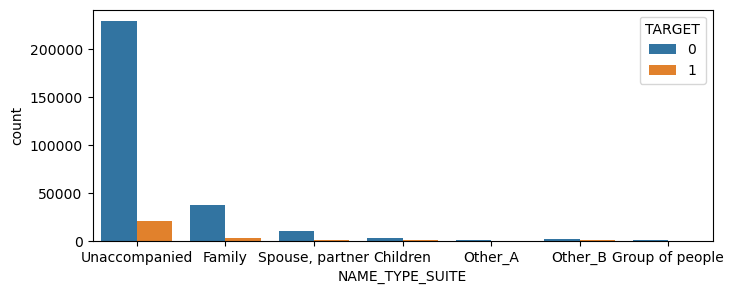

In [145]:
plt.figure(figsize=(8,3))
sns.countplot(x=d1.NAME_TYPE_SUITE,hue=d1.TARGET)

In [146]:
d1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [147]:
#Manual encoding
d1.NAME_TYPE_SUITE=d1.NAME_TYPE_SUITE.map({'Group of people':0,'Other_A':1,'Other_B':2,'Children':3,'Spouse, partner':4,'Family':5,'Unaccompanied':6})

In [148]:
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            2             0                0   
2       0                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                6          Working  Secondary / secondary special   
1                5    State servant               Higher education   
2                6          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          9.0   
1      -16765          -1188            -1186.0             -291          9.0   
2      -19046           -225            -4260.0            -2531         26.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246      0.535276   
2              Government      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.13

In [149]:
#NAME_INCOME_TYPE
d1.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

<Axes: xlabel='NAME_INCOME_TYPE', ylabel='count'>

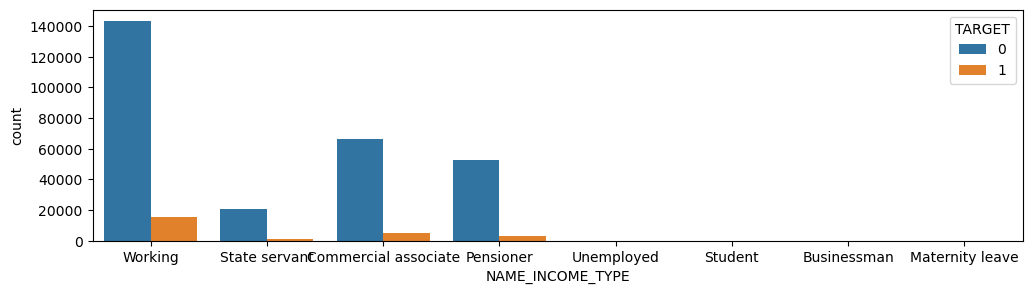

In [150]:
#Go with manual encoding
plt.figure(figsize=(12,3))
sns.countplot(x=d1.NAME_INCOME_TYPE,hue=d1.TARGET)

In [151]:
d1.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [152]:
#Manual encoding
d1.NAME_INCOME_TYPE=d1.NAME_INCOME_TYPE.map({'Working':7,'Commercial associate':6,'Pensioner':5,'State servant':4,'Unemployed':3,'Student':2,'Businessman':1,'Maternity leave':0})


In [153]:
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            2             0                0   
2       0                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                6                 7  Secondary / secondary special   
1                5                 4               Higher education   
2                6                 7  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          9.0   
1      -16765          -1188            -1186.0             -291          9.0   
2      -19046           -225            -4260.0            -2531         26.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246      0.535276   
2              Government      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         

In [154]:
#NAME_EDUCATION_TYPE
d1.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

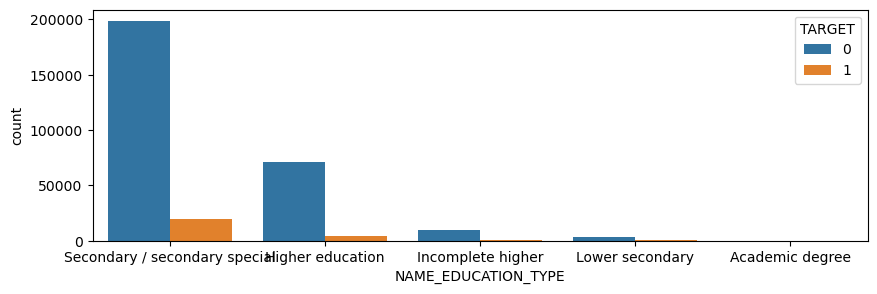

In [155]:
#Go with manual encoding
plt.figure(figsize=(10,3))
sns.countplot(x=d1.NAME_EDUCATION_TYPE,hue=d1.TARGET)

In [156]:
#Manual encoding
d1.NAME_EDUCATION_TYPE=d1.NAME_EDUCATION_TYPE.map({'Secondary / secondary special':4,'Higher education':3,'Incomplete higher':2,'Lower secondary':1,'Academic degree':0})


In [157]:
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            2             0                0   
2       0                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0                6                 7                    4   
1                5                 4                    3   
2                6                 7                    4   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          9.0   
1      -16765          -1188            -1186.0             -291          9.0   
2      -19046           -225            -4260.0            -2531         26.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246      0.535276   
2              Government      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379   

   FLOORSMAX_AVG  FLOORSMIN_A

In [158]:
#NAME_FAMILY_STATUS
d1.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='count'>

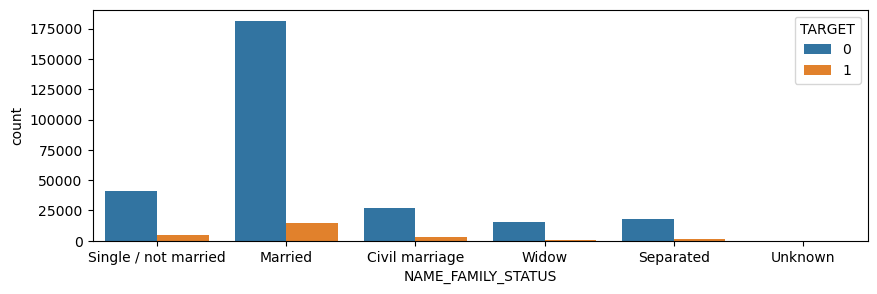

In [159]:
#Go with manual encoding
plt.figure(figsize=(10,3))
sns.countplot(x=d1.NAME_FAMILY_STATUS,hue=d1.TARGET)

In [160]:
#Manual encoding
d1.NAME_FAMILY_STATUS=d1.NAME_FAMILY_STATUS.map({'Married':5,'Single / not married':4,'Civil marriage':3,'Separated':2,'Widow':1,'Unknown':0})


In [161]:
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            2             0                0   
2       0                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   4   
1                5                 4                    3                   5   
2                6                 7                    4                   4   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.010032      -19046           -225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          9.0           1   
1            -1186.0             -291          9.0           1   
2            -4260.0            -2531         26.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246      0.535276   
2              Government      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LAND

In [162]:
#NAME_HOUSING_TYPE
d1.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

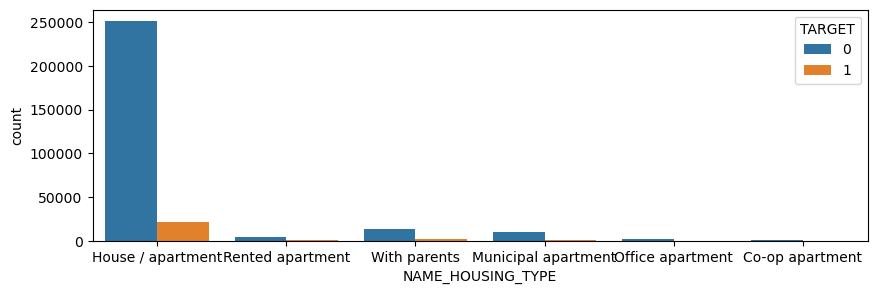

In [163]:
#Go with manual encoding
plt.figure(figsize=(10,3))
sns.countplot(x=d1.NAME_HOUSING_TYPE,hue=d1.TARGET)

In [164]:
d1.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [165]:
#Manual encoding
d1.NAME_HOUSING_TYPE=d1.NAME_HOUSING_TYPE.map({'House / apartment':5,'With parents':4,'Municipal apartment':3,'Rented apartment':2,'Office apartment':1,'Co-op apartment':0})


In [166]:
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            2             0                0   
2       0                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   4   
1                5                 4                    3                   5   
2                6                 7                    4                   4   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  5                    0.018801       -9461           -637   
1                  5                    0.003541      -16765          -1188   
2                  5                    0.010032      -19046           -225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          9.0           1   
1            -1186.0             -291          9.0           1   
2            -4260.0            -2531         26.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246      0.535276   
2              Government      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LAND

In [167]:
#OCCUPATION_TYPE
d1.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers',
       'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

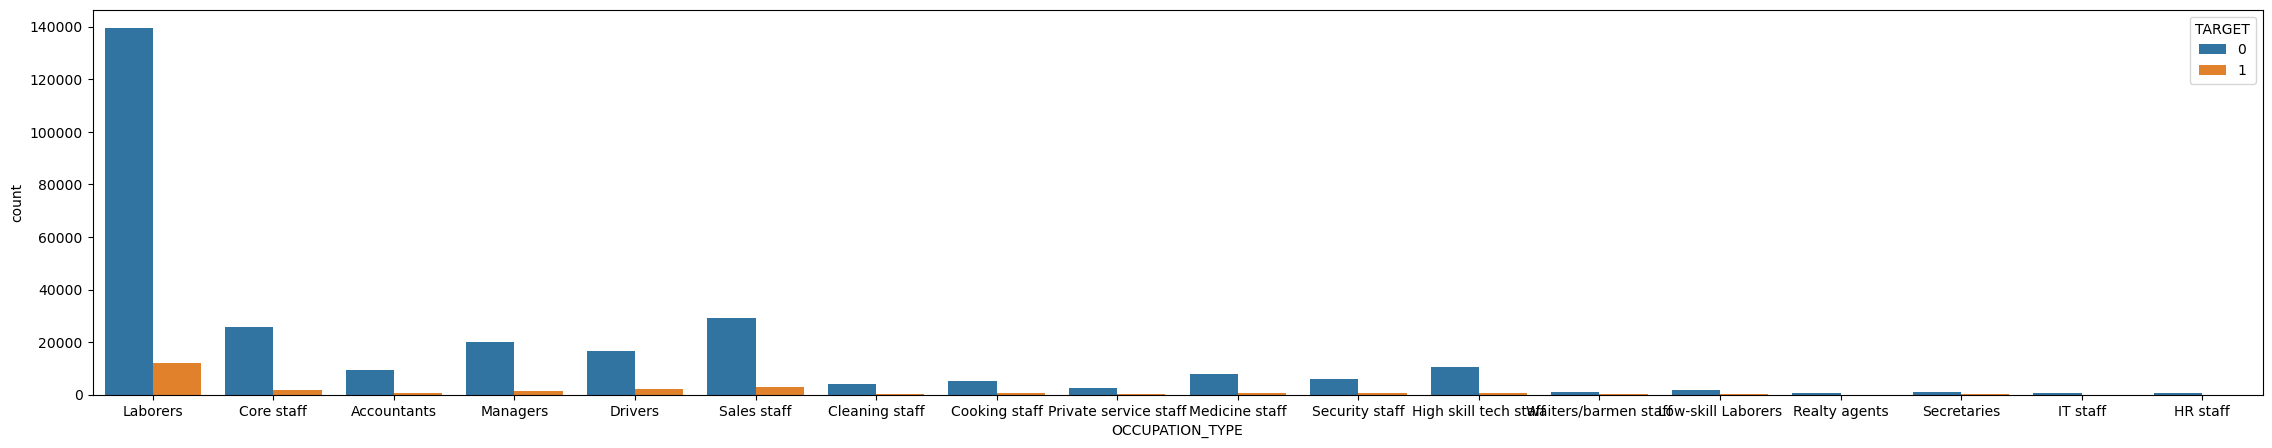

In [168]:
#Go with label encoding
plt.figure(figsize=(28,5))
sns.countplot(x=d1.OCCUPATION_TYPE,hue=d1.TARGET)

In [169]:
d1.OCCUPATION_TYPE.value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

In [170]:
#importing label encoder from sklearn
from sklearn.preprocessing import LabelEncoder
#object creation
label = LabelEncoder()
#applying label encoder to OCCUPATION_TYPE
d1.OCCUPATION_TYPE=label.fit_transform(d1.OCCUPATION_TYPE)

In [171]:
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            2             0                0   
2       0                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   4   
1                5                 4                    3                   5   
2                6                 7                    4                   4   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  5                    0.018801       -9461           -637   
1                  5                    0.003541      -16765          -1188   
2                  5                    0.010032      -19046           -225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          9.0           1   
1            -1186.0             -291          9.0           1   
2            -4260.0            -2531         26.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8              1.0                     2   
1                3              2.0                     1   
2                8              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246      0.535276   
2              Government      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379   

   FLOORSMAX_AVG  FLOORSMIN_AVG  

In [172]:
#WEEKDAY_APPR_PROCESS_START
d1.WEEKDAY_APPR_PROCESS_START.unique()

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

In [173]:
d1.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

<Axes: xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='count'>

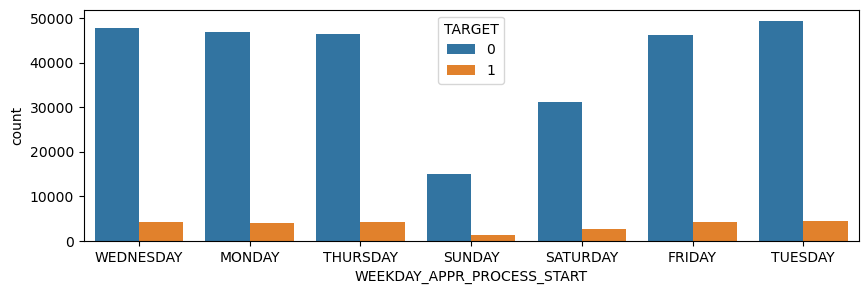

In [174]:
#Go with label encoding for this column
plt.figure(figsize=(10,3))
sns.countplot(x=d1.WEEKDAY_APPR_PROCESS_START,hue=d1.TARGET)

In [175]:
#importing label encoder from sklearn
from sklearn.preprocessing import LabelEncoder
#object creation
label = LabelEncoder()
#applying label encoder to WEEKDAY_APPR_PROCESS_START
d1.WEEKDAY_APPR_PROCESS_START=label.fit_transform(d1.WEEKDAY_APPR_PROCESS_START)

In [176]:
#check
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            2             0                0   
2       0                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   4   
1                5                 4                    3                   5   
2                6                 7                    4                   4   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  5                    0.018801       -9461           -637   
1                  5                    0.003541      -16765          -1188   
2                  5                    0.010032      -19046           -225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          9.0           1   
1            -1186.0             -291          9.0           1   
2            -4260.0            -2531         26.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8              1.0                     2   
1                3              2.0                     1   
2                8              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           6   
1                            1                           1   
2                            2                           1   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246      0.535276   
2              Government      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379   

   FLOORSMAX_AVG  FLOORSMIN_A

In [177]:
#ORGANIZATION_TYPE
d1.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [178]:
d1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [179]:
#importing label encoder from sklearn
from sklearn.preprocessing import LabelEncoder
#object creation
label = LabelEncoder()
#applying label encoder to ORGANIZATION_TYPE
d1.ORGANIZATION_TYPE=label.fit_transform(d1.ORGANIZATION_TYPE)

In [181]:
#Check 
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            2             0                0   
2       0                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   4   
1                5                 4                    3                   5   
2                6                 7                    4                   4   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  5                    0.018801       -9461           -637   
1                  5                    0.003541      -16765          -1188   
2                  5                    0.010032      -19046           -225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          9.0           1   
1            -1186.0             -291          9.0           1   
2            -4260.0            -2531         26.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8              1.0                     2   
1                3              2.0                     1   
2                8              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           6   
1                            1                           1   
2                            2                           1   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                  5      0.083037      0.262949      0.139376   
1                 39      0.311267      0.622246      0.535276   
2                 11      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LI

In [182]:
#FONDKAPREMONT_MODE
d1.FONDKAPREMONT_MODE.unique()

array(['reg oper account', 'org spec account', 'reg oper spec account',
       'not specified'], dtype=object)

<Axes: xlabel='FONDKAPREMONT_MODE', ylabel='count'>

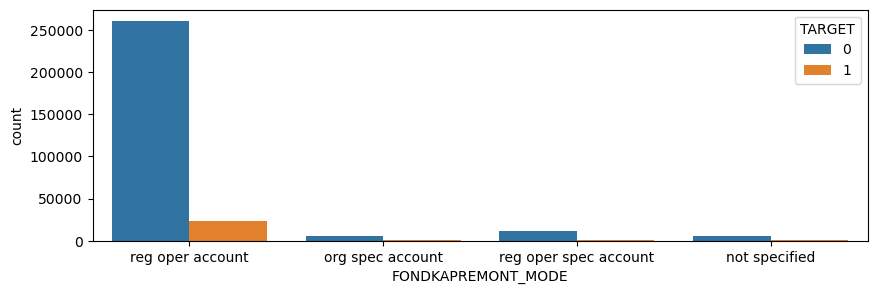

In [183]:
#Go with manual encoding
plt.figure(figsize=(10,3))
sns.countplot(x=d1.FONDKAPREMONT_MODE,hue=d1.TARGET)

In [184]:
d1.FONDKAPREMONT_MODE.value_counts()

reg oper account         284125
reg oper spec account     12080
not specified              5687
org spec account           5619
Name: FONDKAPREMONT_MODE, dtype: int64

In [185]:
#Manual encoding
d1.FONDKAPREMONT_MODE=d1.FONDKAPREMONT_MODE.map({'reg oper account':3,'reg oper spec account':2,'not specified':1,'org spec account':0})


In [186]:
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            2             0                0   
2       0                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   4   
1                5                 4                    3                   5   
2                6                 7                    4                   4   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  5                    0.018801       -9461           -637   
1                  5                    0.003541      -16765          -1188   
2                  5                    0.010032      -19046           -225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          9.0           1   
1            -1186.0             -291          9.0           1   
2            -4260.0            -2531         26.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8              1.0                     2   
1                3              2.0                     1   
2                8              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           6   
1                            1                           1   
2                            2                           1   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                  5      0.083037      0.262949      0.139376   
1                 39      0.311267      0.622246      0.535276   
2                 11      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LI

In [187]:
#HOUSETYPE_MODE
d1.HOUSETYPE_MODE.unique()

array(['block of flats', 'terraced house', 'specific housing'],
      dtype=object)

<Axes: xlabel='HOUSETYPE_MODE', ylabel='count'>

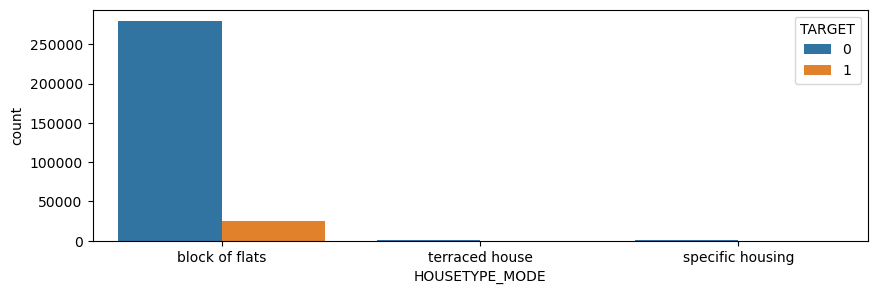

In [188]:
#Go with manual encoding
plt.figure(figsize=(10,3))
sns.countplot(x=d1.HOUSETYPE_MODE,hue=d1.TARGET)

In [189]:
d1.HOUSETYPE_MODE.value_counts()

block of flats      304800
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

In [190]:
#Manual encoding
d1.HOUSETYPE_MODE=d1.HOUSETYPE_MODE.map({'block of flats':2,'specific housing':1,'terraced house':0})


In [191]:
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            2             0                0   
2       0                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   4   
1                5                 4                    3                   5   
2                6                 7                    4                   4   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  5                    0.018801       -9461           -637   
1                  5                    0.003541      -16765          -1188   
2                  5                    0.010032      -19046           -225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          9.0           1   
1            -1186.0             -291          9.0           1   
2            -4260.0            -2531         26.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8              1.0                     2   
1                3              2.0                     1   
2                8              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           6   
1                            1                           1   
2                            2                           1   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                  5      0.083037      0.262949      0.139376   
1                 39      0.311267      0.622246      0.535276   
2                 11      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LI

In [192]:
#WALLSMATERIAL_MODE
d1.WALLSMATERIAL_MODE.unique()

array(['Stone, brick', 'Block', 'Panel', 'Mixed', 'Wooden', 'Others',
       'Monolithic'], dtype=object)

<Axes: xlabel='WALLSMATERIAL_MODE', ylabel='count'>

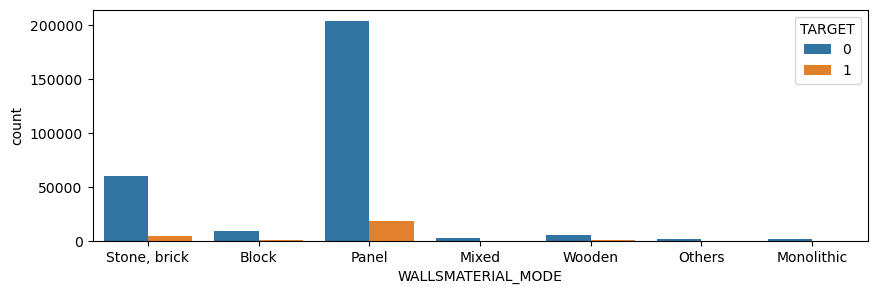

In [193]:
#Go with label encoding
plt.figure(figsize=(10,3))
sns.countplot(x=d1.WALLSMATERIAL_MODE,hue=d1.TARGET)

In [194]:
d1.WALLSMATERIAL_MODE.value_counts()

Panel           222381
Stone, brick     64815
Block             9253
Wooden            5362
Mixed             2296
Monolithic        1779
Others            1625
Name: WALLSMATERIAL_MODE, dtype: int64

In [196]:
#importing label encoder from sklearn
from sklearn.preprocessing import LabelEncoder
#object creation
label = LabelEncoder()
#applying label encoder to WALLSMATERIAL_MODE
d1.WALLSMATERIAL_MODE=label.fit_transform(d1.WALLSMATERIAL_MODE)

In [197]:
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            2             0                0   
2       0                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   4   
1                5                 4                    3                   5   
2                6                 7                    4                   4   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  5                    0.018801       -9461           -637   
1                  5                    0.003541      -16765          -1188   
2                  5                    0.010032      -19046           -225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          9.0           1   
1            -1186.0             -291          9.0           1   
2            -4260.0            -2531         26.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8              1.0                     2   
1                3              2.0                     1   
2                8              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           6   
1                            1                           1   
2                            2                           1   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                  5      0.083037      0.262949      0.139376   
1                 39      0.311267      0.622246      0.535276   
2                 11      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LI

In [198]:
#EMERGENCYSTATE_MODE
d1.EMERGENCYSTATE_MODE.unique()

array(['No', 'Yes'], dtype=object)

In [199]:
#Manual encoding
d1['EMERGENCYSTATE_MODE']=d1['EMERGENCYSTATE_MODE'].map({'Yes':1,'No':0})

In [200]:
d1.head(3)

TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1                   1            1             0                1   
1       0                   1            2             0                0   
2       0                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   4   
1                5                 4                    3                   5   
2                6                 7                    4                   4   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  5                    0.018801       -9461           -637   
1                  5                    0.003541      -16765          -1188   
2                  5                    0.010032      -19046           -225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          9.0           1   
1            -1186.0             -291          9.0           1   
2            -4260.0            -2531         26.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8              1.0                     2   
1                3              2.0                     1   
2                8              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           6   
1                            1                           1   
2                            2                           1   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   

   ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                  5      0.083037      0.262949      0.139376   
1                 39      0.311267      0.622246      0.535276   
2                 11      0.505998      0.555912      0.729567   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2          0.0876            0.0763                       0.9816   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2           0.7552          0.0211           0.00         0.1379   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LI

In [201]:
#check
d1.isnull().sum()


TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

In [202]:
#Check all columns that are converted into numerical columns
#Display all columns from dataset
d1.head(pd.set_option('display.max_columns',None))


TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0            1                   1            1             0   
1            0                   1            2             0   
2            0                   0            1             1   
3            0                   1            2             0   
4            0                   1            1             0   
...        ...                 ...          ...           ...   
307506       0                   1            1             0   
307507       0                   1            2             0   
307508       0                   1            2             0   
307509       1                   1            2             0   
307510       0                   1            2             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     0             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307506                0             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   
307510                0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0           24700.5         351000.0                6                 7   
1           35698.5        1129500.0                5                 4   
2            6750.0         135000.0                6                 7   
3           29686.5         297000.0                6                 7   
4           21865.5         513000.0                6                 7   
...             ...              ...              ...               ...   
307506      27558.0         225000.0                6                 7   
307507      12001.5         225000.0                6                 5   
307508      29979.0         585000.0                6                 7   
307509      20205.0         319500.0                6                 6   
307510      49117.5         675000.0                6                 6   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                         4                   4                  5   
1                         3                   5                  5   
2                         4                   4                  5   
3                         4                   3                  5   
4                         4                   4                  5   
...                     ...                 ...                ...   
307506                    4                   2                  4   
307507                    4                   1                  5   
307508                    3                   2                  5   
307509                    4                   5                  5   
307510                    3                   5                  5   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                         0.018801       -9461           -637   
1                         0.003541      -16765          -1188   
2                         0.010032      -19046           -225   
3                         0.008019      -19005          -3039   
4                         0.028663      -19932          -3038   
...                            ...         ...            ...   
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966 

In [203]:
#Scaling

#min-max scaler
from sklearn.preprocessing import MinMaxScaler
#initialize
scaling=MinMaxScaler()


In [204]:
#continuous data
continuous_data=d1.select_dtypes(include=['float64'])
continuous_data

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
1               270000.0   1293502.5      35698.5        1129500.0   
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
...                  ...         ...          ...              ...   
307506          157500.0    254700.0      27558.0         225000.0   
307507           72000.0    269550.0      12001.5         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307509          171000.0    370107.0      20205.0         319500.0   
307510          157500.0    675000.0      49117.5         675000.0   

        REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  OWN_CAR_AGE  \
0                         0.018801            -3648.0          9.0   
1                         0.003541            -1186.0          9.0   
2                         0.010032            -4260.0         26.0   
3                         0.008019            -9833.0          9.0   
4                         0.028663            -4311.0          9.0   
...                            ...                ...          ...   
307506                    0.032561            -8456.0          9.0   
307507                    0.025164            -4388.0          9.0   
307508                    0.005002            -6737.0          9.0   
307509                    0.005313            -2562.0          9.0   
307510                    0.046220            -5128.0          9.0   

        CNT_FAM_MEMBERS  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                   1.0      0.083037      0.262949      0.139376   
1                   2.0      0.311267      0.622246      0.535276   
2                   1.0      0.505998      0.555912      0.729567   
3                   2.0      0.505998      0.650442      0.535276   
4                   1.0      0.505998      0.322738      0.535276   
...                 ...           ...           ...           ...   
307506              1.0      0.145570      0.681632      0.535276   
307507              1.0      0.505998      0.115992      0.535276   
307508              1.0      0.744026      0.535722      0.218859   
307509              2.0      0.505998      0.514163      0.661024   
307510              2.0      0.734460      0.708569      0.113922   

        APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0               0.0247            0.0369                       0.9722   
1               0.0959            0.0529                       0.9851   
2               0.0876            0.0763                       0.9816   
3               0.0876            0.0763                       0.9816   
4               0.0876            0.0763                       0.9816   
...                ...               ...                          ...   
307506          0.2021            0.0887                       0.9876   
307507          0.0247            0.0435                       0.9727   
307508          0.1031            0.0862                       0.9816   
307509          0.0124            0.0763                       0.9771   
307510          0.0742            0.0526                       0.9881   

        YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0                0.6192          0.0143           0.00         0.0690   
1                0.7960          0.0605           0.08         0.0345   
2                0.7552          0.0211           0.00         0.1379   
3                0.7552          0.0211           0.00         0.1379   
4                0.7552          0.0211           0.00         0.1379   
...                 ...             ...            ...            ...   
307506           0.8300          0.0202           0.22         0.1034   
307507           0.6260          0.0

In [205]:
#scaling is applied on continuous data

scaled_data=scaling.fit_transform(continuous_data)
scaled_data

array([[0.00151187, 0.09028652, 0.09003159, ..., 0.        , 0.        ,
        0.04      ],
       [0.00208892, 0.31173596, 0.13292383, ..., 0.        , 0.        ,
        0.        ],
       [0.00035777, 0.02247191, 0.02002457, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0010887 , 0.15796854, 0.11061776, ..., 0.03703704, 0.        ,
        0.04      ],
       [0.00124258, 0.08117528, 0.07249912, ..., 0.        , 0.        ,
        0.        ],
       [0.00112717, 0.15730337, 0.18525799, ..., 0.07407407, 0.        ,
        0.04      ]])

In [206]:
continuous_data.columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

In [207]:
d1.columns.values.tolist()

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BU

In [208]:
#convert it into dataframe
df=pd.DataFrame(scaled_data,columns=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'])


In [209]:
df

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               0.001512    0.090287     0.090032         0.077441   
1               0.002089    0.311736     0.132924         0.271605   
2               0.000358    0.022472     0.020025         0.023569   
3               0.000935    0.066837     0.109477         0.063973   
4               0.000819    0.116854     0.078975         0.117845   
...                  ...         ...          ...              ...   
307506          0.001127    0.052360     0.101176         0.046016   
307507          0.000396    0.056067     0.040505         0.046016   
307508          0.001089    0.157969     0.110618         0.135802   
307509          0.001243    0.081175     0.072499         0.069585   
307510          0.001127    0.157303     0.185258         0.158249   

        REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  OWN_CAR_AGE  \
0                         0.256321           0.852140     0.098901   
1                         0.045016           0.951929     0.098901   
2                         0.134897           0.827335     0.285714   
3                         0.107023           0.601451     0.098901   
4                         0.392880           0.825268     0.098901   
...                            ...                ...          ...   
307506                    0.446855           0.657263     0.098901   
307507                    0.344429           0.822147     0.098901   
307508                    0.065247           0.726937     0.098901   
307509                    0.069553           0.896158     0.098901   
307510                    0.635991           0.792153     0.098901   

        CNT_FAM_MEMBERS  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0              0.000000      0.072215      0.307542      0.155054   
1              0.052632      0.312933      0.727773      0.597163   
2              0.000000      0.518318      0.650190      0.814130   
3              0.052632      0.518318      0.760751      0.597163   
4              0.000000      0.518318      0.377472      0.597163   
...                 ...           ...           ...           ...   
307506         0.000000      0.138170      0.797231      0.597163   
307507         0.000000      0.518318      0.135663      0.597163   
307508         0.000000      0.769370      0.626575      0.243815   
307509         0.052632      0.518318      0.601360      0.737587   
307510         0.052632      0.759279      0.828736      0.126630   

        APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0               0.0247            0.0369                       0.9722   
1               0.0959            0.0529                       0.9851   
2               0.0876            0.0763                       0.9816   
3               0.0876            0.0763                       0.9816   
4               0.0876            0.0763                       0.9816   
...                ...               ...                          ...   
307506          0.2021            0.0887                       0.9876   
307507          0.0247            0.0435                       0.9727   
307508          0.1031            0.0862                       0.9816   
307509          0.0124            0.0763                       0.9771   
307510          0.0742            0.0526                       0.9881   

        YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0                0.6192          0.0143           0.00         0.0690   
1                0.7960          0.0605           0.08         0.0345   
2                0.7552          0.0211           0.00         0.1379   
3                0.7552          0.0211           0.00         0.1379   
4                0.7552          0.0211           0.00         0.1379   
...                 ...             ...            ...            ...   
307506           0.8300          0.0202           0.22         0.1034   
307507           0.6260          0.0

In [210]:
df1=d1[['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',]]


In [211]:
new_data=pd.concat([df,df1],axis=1)
new_data

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               0.001512    0.090287     0.090032         0.077441   
1               0.002089    0.311736     0.132924         0.271605   
2               0.000358    0.022472     0.020025         0.023569   
3               0.000935    0.066837     0.109477         0.063973   
4               0.000819    0.116854     0.078975         0.117845   
...                  ...         ...          ...              ...   
307506          0.001127    0.052360     0.101176         0.046016   
307507          0.000396    0.056067     0.040505         0.046016   
307508          0.001089    0.157969     0.110618         0.135802   
307509          0.001243    0.081175     0.072499         0.069585   
307510          0.001127    0.157303     0.185258         0.158249   

        REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  OWN_CAR_AGE  \
0                         0.256321           0.852140     0.098901   
1                         0.045016           0.951929     0.098901   
2                         0.134897           0.827335     0.285714   
3                         0.107023           0.601451     0.098901   
4                         0.392880           0.825268     0.098901   
...                            ...                ...          ...   
307506                    0.446855           0.657263     0.098901   
307507                    0.344429           0.822147     0.098901   
307508                    0.065247           0.726937     0.098901   
307509                    0.069553           0.896158     0.098901   
307510                    0.635991           0.792153     0.098901   

        CNT_FAM_MEMBERS  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0              0.000000      0.072215      0.307542      0.155054   
1              0.052632      0.312933      0.727773      0.597163   
2              0.000000      0.518318      0.650190      0.814130   
3              0.052632      0.518318      0.760751      0.597163   
4              0.000000      0.518318      0.377472      0.597163   
...                 ...           ...           ...           ...   
307506         0.000000      0.138170      0.797231      0.597163   
307507         0.000000      0.518318      0.135663      0.597163   
307508         0.000000      0.769370      0.626575      0.243815   
307509         0.052632      0.518318      0.601360      0.737587   
307510         0.052632      0.759279      0.828736      0.126630   

        APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0               0.0247            0.0369                       0.9722   
1               0.0959            0.0529                       0.9851   
2               0.0876            0.0763                       0.9816   
3               0.0876            0.0763                       0.9816   
4               0.0876            0.0763                       0.9816   
...                ...               ...                          ...   
307506          0.2021            0.0887                       0.9876   
307507          0.0247            0.0435                       0.9727   
307508          0.1031            0.0862                       0.9816   
307509          0.0124            0.0763                       0.9771   
307510          0.0742            0.0526                       0.9881   

        YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0                0.6192          0.0143           0.00         0.0690   
1                0.7960          0.0605           0.08         0.0345   
2                0.7552          0.0211           0.00         0.1379   
3                0.7552          0.0211           0.00         0.1379   
4                0.7552          0.0211           0.00         0.1379   
...                 ...             ...            ...            ...   
307506           0.8300          0.0202           0.22         0.1034   
307507           0.6260          0.0

In [212]:
#Creating X & Y
X=d1.drop(labels=['TARGET'],axis=1)
Y=d1[['TARGET']]

In [177]:
X.shape

(307511, 120)

<function matplotlib.pyplot.show(close=None, block=None)>

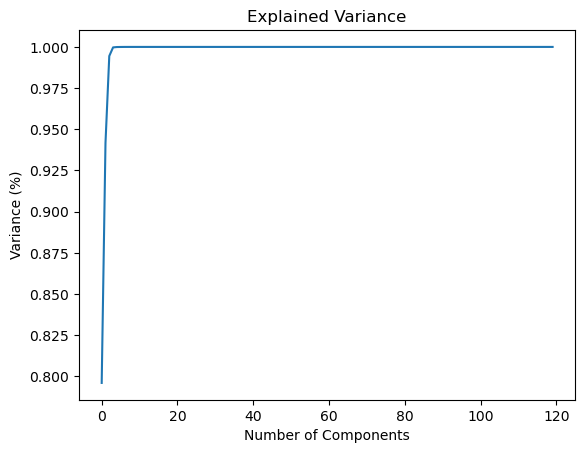

In [214]:
# Applying PCA for dimensionality reduction
from sklearn.decomposition import PCA

#initialize the PCA
pca=PCA()
principalComponents=pca.fit_transform(X)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show

-From the diagram above, it can be seen that maximum components explain around 99% to 100% of the variance in data 

-Instead of giving all the columns as input, we will only feed 5 principal components of the data to the machine learning algorithm and will obtain a similar result (as PCA helps to reduce the dimensions of the features)

In [215]:
pca=PCA(n_components=5)
a=pca.fit_transform(X)

principal_comp=pd.DataFrame(data=a,columns=['PC1','PC2','PC3','PC4','PC5'])

In [216]:
principal_comp.head()

PC1           PC2           PC3           PC4           PC5
0 -263348.122317  59608.771848 -66742.689108  -7917.548004  -2750.640152
1  917753.398443  25998.362196 -46589.299618 -33407.944279  10206.270736
2 -619920.756966 -45166.953187 -77880.086980  16642.473063   8077.643478
3 -374199.962538   1667.337626 -73812.140224  16026.904508  -9620.755274
4  -83045.647754 -36772.592952 -70040.899756  39875.875691   4300.781350

# Feature Selection

In [ ]:
# In feature selection, we select the imp features by dropping the irrelevent column.
# Here, Irrelevent column is SK_ID_CURR.......which we already dropped it.


<Axes: >

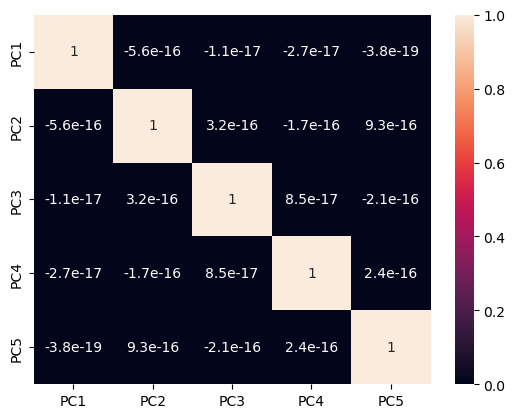

In [217]:
sns.heatmap(principal_comp.corr(),annot=True)

In [ ]:
#No column is showing crrelation of more than 85% 

In [ ]:
#Now the data is completely ready and clean.....so we are going to train the model 

# Model Building

In [220]:
#split the data into i/p(x) & o/p(y)
x=principal_comp
y=d1.TARGET

In [222]:
#split the data for training and testing 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [223]:
#Balancing the data
#data is imbalanced, so we have to balanced the data=> using SMOTE

In [ ]:
# Install imblearn package

#!pip install imblearn

In [224]:
#Balancing the data
from imblearn.over_sampling import SMOTE
#Object creation
smote=SMOTE()     
#Importing counter to check count of each label
from collections import Counter
#Checking count for each class
print('Actual Classes',Counter(y_train))
#Applying sampling on target variable
x_smote, y_smote = smote.fit_resample(x_train,y_train)    
#Checking count after sampling for each class
print('Smote Classes',Counter(y_smote))

Actual Classes Counter({0: 197845, 1: 17412})
Smote Classes Counter({0: 197845, 1: 197845})


## Apply Algorithm:

1) Logistic Regression
2) KNN
3) Decision Tree
4) Random Forest
5) Gradient Boosting
6) XG Boost

# Evaluation of Model

In [225]:
#Importing evaluation metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

## Logistic Regression

In [226]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression
#initialise the model
LR=LogisticRegression()
#train the model
LR.fit(x_smote,y_smote)


LogisticRegression()

In [227]:
y_pred1=LR.predict(x_test)

In [228]:
confusion_matrix(y_test,y_pred1)

array([[35580, 49261],
       [ 2133,  5280]], dtype=int64)

In [229]:
accuracy_score(y_test,y_pred1)

0.4429076246016433

In [230]:
#Precision
precision_score(y_test,y_pred1) 

0.09680790597898828

In [231]:
#Recall
recall_score(y_test,y_pred1) 

0.7122622420072845

In [232]:
#f1 score
f1_score(y_test,y_pred1)


0.17044904283823484

In [233]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.42      0.58     84841
           1       0.10      0.71      0.17      7413

    accuracy                           0.44     92254
   macro avg       0.52      0.57      0.38     92254
weighted avg       0.88      0.44      0.55     92254



In [234]:
from sklearn.metrics import roc_curve,auc

In [235]:
False_positive_rate,True_positive_rate,Thresholds=roc_curve(y_test,y_pred1)

In [236]:
roc_auc_score=auc(False_positive_rate,True_positive_rate)
print(roc_auc_score)

0.5658174754784834


## KNN

In [242]:
#Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier
#initialise the model
KNN=KNeighborsClassifier(n_neighbors=3)
#train the model
KNN.fit(x_smote,y_smote)

KNeighborsClassifier(n_neighbors=3)

In [243]:
y_pred=KNN.predict(x_test)

In [244]:
accuracy_score(y_test,y_pred)

0.7388405922778416

In [245]:
#How to select a precise K value
error=[]
for k in range(1,11):
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_smote,y_smote)
    y_pred=KNN.predict(x_test)
    error.append(np.mean(y_pred!=y_test))

Text(0, 0.5, 'Error')

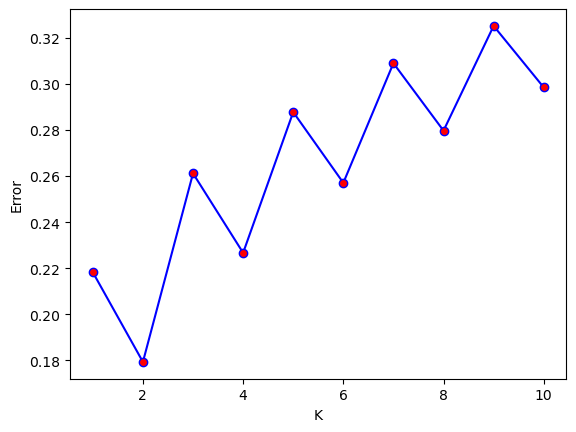

In [246]:
plt.plot(range(1,11),error,color='blue',marker='o',markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Error')

In [247]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=2)
KNN.fit(x_smote,y_smote)

KNeighborsClassifier(n_neighbors=2)

In [258]:
y_pred2=KNN.predict(x_test)

In [259]:
confusion_matrix(y_test,y_pred2)

array([[74478, 10363],
       [ 6184,  1229]], dtype=int64)

In [260]:
accuracy_score(y_test,y_pred2)

0.8206365035662411

In [261]:
#Precision
precision_score(y_test,y_pred2) 

0.10602139406487232

In [262]:
#Recall
recall_score(y_test,y_pred2) 

0.1657898286793471

In [263]:
#f1 score
f1_score(y_test,y_pred2) 

0.12933438568797687

## Decision Tree

In [254]:
#import  Decision Tree
from sklearn.tree import DecisionTreeClassifier
#initialise the model
DT=DecisionTreeClassifier()
#train the model
DT.fit(x_smote,y_smote)

DecisionTreeClassifier()

In [264]:
y_pred3=DT.predict(x_test)

In [265]:
confusion_matrix(y_test,y_pred3)

array([[68504, 16337],
       [ 5498,  1915]], dtype=int64)

In [266]:
accuracy_score(y_test,y_pred3)

0.7633164957617014

In [267]:
#Precision
precision_score(y_test,y_pred3) 

0.10492000876616261

In [268]:
#Recall
recall_score(y_test,y_pred3) 

0.25832996087953597

In [269]:
#f1 score
f1_score(y_test,y_pred3) 

0.14923046951100724

## Random Forest

In [270]:
#import Random Forest
from sklearn.ensemble import RandomForestClassifier
#initialise teh model
RF=RandomForestClassifier()
#train the model
RF.fit(x_smote,y_smote)


RandomForestClassifier()

In [271]:
#prediction
y_pred4=RF.predict(x_test)

In [272]:
confusion_matrix(y_test,y_pred4)

array([[73411, 11430],
       [ 5806,  1607]], dtype=int64)

In [273]:
accuracy_score(y_test,y_pred4)

0.813167992715763

In [274]:
#Precision
precision_score(y_test,y_pred4) 

0.12326455472884866

In [275]:
#Recall
recall_score(y_test,y_pred4) 

0.21678133009577769

In [276]:
#f1 score
f1_score(y_test,y_pred4) 

0.1571638141809291

## Gradient Boosting


In [277]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100)
GB.fit(x_train,y_train)


GradientBoostingClassifier()

In [278]:
y_pred5=GB.predict(x_test)

In [279]:
confusion_matrix(y_test,y_pred5)

array([[84841,     0],
       [ 7411,     2]], dtype=int64)

In [280]:
accuracy_score(y_test,y_pred5)

0.9196674398942051

In [281]:
#Precision
precision_score(y_test,y_pred5) 

1.0

In [282]:
#Recall
recall_score(y_test,y_pred5) 

0.0002697963037906381

In [283]:
#f1 score
f1_score(y_test,y_pred5) 

0.0005394470667565746

## XG Boost

In [284]:
# Installing xg boost
! pip install xgboost

In [285]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [286]:
y_pred6=model.predict(x_test)

In [287]:
confusion_matrix(y_test,y_pred6)

array([[84839,     2],
       [ 7411,     2]], dtype=int64)

In [288]:
accuracy_score(y_test,y_pred6)

0.9196457606174258

In [289]:
#Precision
precision_score(y_test,y_pred6) 

0.5

In [290]:
#Recall
recall_score(y_test,y_pred6) 

0.0002697963037906381

In [291]:
#f1 score
f1_score(y_test,y_pred6) 

0.0005393016044222731

In [ ]:
#Hyperparameter Tunning:

#Trying for the hyperparameters for each algorithms, but it takes long time to execute.

# Conclusion:

-We applied different alorithms like Logistic Regression, KNN, Decision Tree, Random Forest, Gradient Boosting and XG Boost.

-Greadient Boosting and XG Boost are more suitable models for Home loan default Prediction, which gives highest accuracy score.
 
-Hyperparameter tunning takes too much time to execute as our dataset is large.

-However, machine learning techniques are useful to predict the output as defaulter & non-defaulter from existing data.

